In [1]:
# !pip install contextily
# !pip install geopandas pyproj

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("merged.csv", dtype={0: "string"})

C:\Users\Eric Zhang\AppData\Local\Temp\ipykernel_117292\3566750728.py:3: DtypeWarning: Columns (44,45,46) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("merged.csv", dtype={0: "string"})


In [3]:
df

,CaseNumber,CaseYear,CrashDate,CrashTimeFormatted,CrashType,CollisionType,CrashSeverity,LightCondition,WeatherCondition,RoadwayAccessControlCde,...,PreCrashActions,isLargeTruckCrash,DriverAgeVehicleOne,DriverAgeVehicleTwo,DriverAgeVehicleThree,DriverAgeVehicleFour,DriverAgeVehicleFive,PersonTypes,PersonInjuries,ApparentFactors
0,34164055,2012,2012-01-04,11:13 Am,Collision With Motor Vehicle,Other,Property Damage,Daylight,Cloudy,999.0,...,V1:(Slowed Or Stopping) V2:(Stopped In Traffic...,0,19.0,0.0,0.0,NaN,NaN,U1:(Driver) / U2:(Driver) / U3:(Driver),U1:(U - Unknown) / U2:(U - Unknown) / U3:(U - ...,"V1:(Driver Inattention,Following Too Closely) ..."
1,34164075,2012,2012-01-03,11:45 Am,Collision With Motor Vehicle,Right Angle,Property Damage,Daylight,Clear,999.0,...,V1:(Slowed Or Stopping) V2:(Going Straight Ahead),0,60.0,0.0,NaN,NaN,NaN,U1:(Driver) / U2:(Driver),U1:(U - Unknown) / U2:(U - Unknown),"V1:(Following Too Closely,Driver Inattention) ..."
2,34164104,2012,2012-01-07,9:30 Pm,Collision With Deer,Other,Property Damage,Dark-Road Unlighted,Cloudy,999.0,...,V1:(Going Straight Ahead),0,22.0,NaN,NaN,NaN,NaN,U1:(Driver),U1:(U - Unknown),"V1:(Animals Action,Not Applicable)"
3,34164105,2012,2012-01-08,6:42 Pm,Collision With Motor Vehicle,Right Angle,Injury,Dark-Road Lighted,Clear,999.0,...,V1:(Going Straight Ahead) V2:(Going Straight A...,0,31.0,0.0,NaN,NaN,NaN,U1:(Driver) / U2:(Driver),U1:(U - Unknown) / U2:(U - Unknown),"V1:(Not Applicable,Not Applicable) / V2:(Traff..."
4,34164107,2012,2012-01-04,6:04 Pm,Coll. W/Earth Ele./Rock Cut/Ditch,Other,Property Damage,Dark-Road Unlighted,Cloudy,999.0,...,V1:(Going Straight Ahead),0,22.0,NaN,NaN,NaN,NaN,U1:(Driver),U1:(U - Unknown),"V1:(Unsafe Speed,Driver Inattention)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291629,40826635,2024,2024-04-04,16:23:00,Collision With Motor Vehicle,Rear End,Property Damage,Daylight,Rain,999.0,...,V1:(Backing) V2:(Parked),0,64.0,NaN,NaN,NaN,NaN,U1:(Driver) / U2:(Invalid Code),U1:(U - Unknown) / U2:(U - Unknown),"V1:(Turning Improper,Not Applicable) / V2:(Not..."
291630,40826645,2024,2024-04-04,15:26:00,Collision With Motor Vehicle,Right Angle,Property Damage,Daylight,Rain,999.0,...,V1:(Going Straight Ahead) V2:(Starting In Traf...,0,29.0,0.0,NaN,NaN,NaN,U1:(Driver) / U2:(Driver),U1:(U - Unknown) / U2:(U - Unknown),"V1:(Passing Or Lane Usage Improperly,Not Appli..."
291631,40827434,2024,2024-10-04,16:19:00,Collision With Motor Vehicle,Left Turn (Against Other Car),Property Damage,Daylight,Clear,999.0,...,V1:(Going Straight Ahead) V2:(Making Left Turn),0,19.0,0.0,NaN,NaN,NaN,U1:(Driver) / U2:(Driver) / U2:(Passenger),U1:(U - Unknown) / U2:(U - Unknown) / U2:(U - ...,"V1:(Traffic Control Devices Disregarded,Not Ap..."
291632,40829615,2024,2024-06-13,17:45:00,Collision With Other Barrier,Other,Property Damage,Daylight,Clear,999.0,...,V1:(Going Straight Ahead),0,70.0,NaN,NaN,NaN,NaN,U1:(Driver),U1:(U - Unknown),"V1:(Driver Inattention,Not Applicable)"


In [4]:
df.columns

Index(['CaseNumber', 'CaseYear', 'CrashDate', 'CrashTimeFormatted',
       'CrashType', 'CollisionType', 'CrashSeverity', 'LightCondition',
       'WeatherCondition', 'RoadwayAccessControlCde', 'RoadwayCharacteristic',
       'RoadSurfaceCondition', 'TrafficControl', 'TrafficWay',
       'MaxInjurySeverity', 'NumberOfFatalities', 'NumberOfInjuries',
       'NumberOfSeriousInjuries', 'NumberOfOtherInjuries', 'NumberOfVehicles',
       'PoliceDept', 'ReportingAgency', 'Precinct',
       'CommercialVehicleCrashInd', 'PPDRCode', 'NonReportable',
       'ReviewedIndicator', 'DMVInsertDate', 'CountyFIPS', 'CountyName',
       'MuniFIPS', 'CityTownName', 'OnStreet', 'ClosestCrossStreet',
       'MasterIntersectionId', 'IntersectionIndicator', 'ReferenceMarker',
       'DistanceFromIntersection', 'DirectionFromIntersection', 'UTMEasting',
       'UTMNorthing', 'NonPublicWayCode', 'ACCESS_CONTROL', 'DIVIDED',
       'FUNCTIONAL_CLASS', 'MAINT_JURISDICTION_TYPE_ID',
       'OWNING_JURISDICTION_T

In [5]:
null_count = df.isna().sum()
print(null_count.to_string())

CaseNumber                          0
CaseYear                            0
CrashDate                           0
CrashTimeFormatted                 65
CrashType                           0
CollisionType                       0
CrashSeverity                      54
LightCondition                      0
WeatherCondition                    0
RoadwayAccessControlCde            16
RoadwayCharacteristic               0
RoadSurfaceCondition                0
TrafficControl                 187711
TrafficWay                          0
MaxInjurySeverity              198612
NumberOfFatalities                  0
NumberOfInjuries                    0
NumberOfSeriousInjuries             0
NumberOfOtherInjuries               0
NumberOfVehicles                    0
PoliceDept                      14135
ReportingAgency                  9011
Precinct                       291630
CommercialVehicleCrashInd           0
PPDRCode                            0
NonReportable                       0
ReviewedIndi

In [6]:
total_null = df.isna().sum().sum()
total_null

2334314

In [7]:
topYear = df["CaseYear"].value_counts().head(10)
topYear

CaseYear
2015    25442
2019    24755
2013    24469
2016    24402
2018    24206
2017    23779
2014    23771
2012    23198
2023    20463
2021    19929
Name: count, dtype: int64

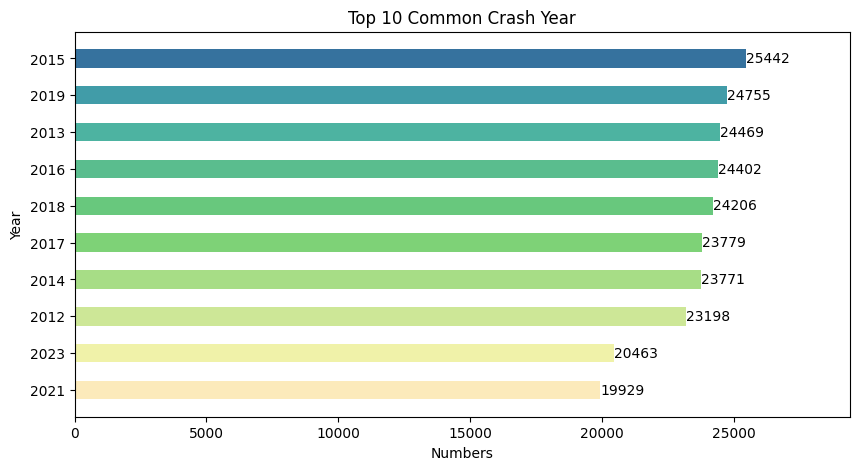

In [8]:
t_labels = topYear[::-1].index
t_values = topYear[::-1].values
t_labels = t_labels.astype(str)
colors = ['#36729e', '#419ca8', '#4db3a1', '#5abd8e', '#68c87d', '#7ed277', '#a7dd86', '#cde797', '#f0f2a9', '#fceabb']

plt.figure(figsize=(10, 5))
plt.barh(t_labels, t_values, height=0.5, color = colors[::-1])

for index, j in enumerate(t_values):
    plt.text(j, index, str(j), va= "center", ha= "left", fontsize = 10)

plt.title("Top 10 Common Crash Year")
plt.xlabel("Numbers")
plt.ylabel("Year")

axis = plt.gca()
axis.set_xlim(0, axis.get_xlim()[1] * 1.1)
plt.show()


In [9]:
df["CaseYear"].value_counts()

CaseYear
2015    25442
2019    24755
2013    24469
2016    24402
2018    24206
2017    23779
2014    23771
2012    23198
2023    20463
2021    19929
2024    19480
2022    19284
2020    18456
Name: count, dtype: int64

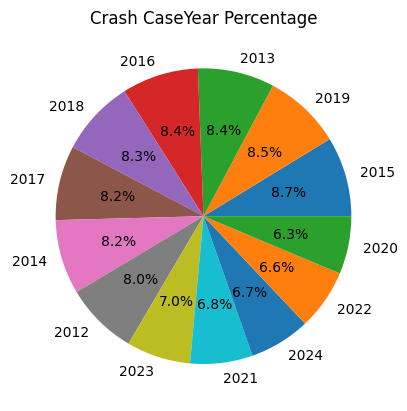

In [10]:
t_labels = df["CaseYear"].value_counts().index
t_values = df["CaseYear"].value_counts().values

plt.title("Crash CaseYear Percentage")
plt.pie(t_values, labels = t_labels, autopct='%1.1f%%')
plt.show()

# Location and Infrastructure

In [11]:
import numpy as np
import pandas as pd
#for dbscan
from sklearn.cluster import DBSCAN
#for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import geopandas as gpd
import contextily as ctx

In [12]:
def outliercheck(fea):
    col = df[fea].dropna()
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1

    lowerb = Q1 - 1.5 * IQR
    upperb = Q3 + 1.5 * IQR

    print("Q1:", Q1)
    print("Q3:", Q3)
    print("IQR:", IQR)
    print("Lower bound:", lowerb)
    print("Upper bound:", upperb)
    outliers = df[(df[fea] < lowerb) | (df[fea] > upperb)]
    print("Outlier count:", len(outliers))
    return outliers[fea]

In [13]:
df["CrashDate"] = pd.to_datetime(df["CrashDate"], errors="coerce")

In [14]:
df["CrashDate"]

0        2012-01-04
1        2012-01-03
2        2012-01-07
3        2012-01-08
4        2012-01-04
            ...    
291629   2024-04-04
291630   2024-04-04
291631   2024-10-04
291632   2024-06-13
291633   2024-04-12
Name: CrashDate, Length: 291634, dtype: datetime64[ns]

In [15]:
df["CaseMonth"] = df["CrashDate"].dt.month

In [16]:
df["CaseMonth"]

0          1
1          1
2          1
3          1
4          1
          ..
291629     4
291630     4
291631    10
291632     6
291633     4
Name: CaseMonth, Length: 291634, dtype: int32

In [17]:
# Location & Infrastructure
# Core Presentation Variables:

# UTMEasting
# UTMNorthing
# CityTownName
# IntersectionIndicator
# OnStreet
# ClosestCrossStreet
# DistanceFromIntersection

# Continued EDA Variables:

# CountyFIPS
# CountyName
# MuniFIPS
# MasterIntersectionId
# DirectionFromIntersection
# ReferenceMarker
# NonPublicWayCode
# NAME
# MAINT_JURISDICTION_TYPE_ID
# OWNING_JURISDICTION_TYPE_ID

In [18]:
# By Basic Summary Statistics, I mean: total count, percent missing, number of unique values, mode (for categorical variables), and mean, median, and standard deviation (for numeric variables).
# For Time Distribution: distribution by year and distribution by month. For categorical variables, this means calculating something like the percentage of crashes in each category per year.
# For Category Distribution, please include: frequency tables, percent distribution, top five categories, and percent labeled as “Unknown,” “Not Entered,” or equivalent.
# Beyond basic EDA, we need to incorporate the following checks where applicable: a Missing Data Audit and Outlier Checks.
# For each variable, check whether coded missing values such as 777, 888, 998, 999, or other abnormal codes appear. Calculate their percentages. If possible, note whether these codes change in frequency over time. This helps us identify reporting inconsistencies.
# Regarding Outlier Checks, examine numeric variables such as driver ages, posted speed, DistanceFromIntersection, and NumberOfVehicles.
# In addition to your statistical outputs (charts, tables, summaries), you must include a Google Doc in your folder with brief descriptions of what you noticed for each variable. If there was no noticeable pattern, explicitly state that. We need documentation of both findings and non-findings so nothing is ambiguous when I build the presentation.

## UTMEasting & UTMNorthing

### UTMEasting

In [19]:
df["UTMEasting"].dtype

dtype('float64')

In [20]:
#Checking null, total count.unqiue variables
count = len(df["UTMEasting"])
count

291634

In [21]:
null_count = df["UTMEasting"].isna().sum()
null_count

0

In [22]:
null_prop = float(null_count/count)
round(null_prop * 100, 3)

0.0

In [23]:
#unique variables
df["UTMEasting"].nunique()

158699

In [24]:
#data summary
df["UTMEasting"].agg(["max","min","mean","median","std"])

max       600119.428395
min       185015.631322
mean      286867.726932
median    287221.103953
std         8376.848765
Name: UTMEasting, dtype: float64

In [25]:
result = outliercheck("UTMEasting")
result.head(10)

Q1: 283747.947657875
Q3: 291068.6764471775
IQR: 7320.728789302462
Lower bound: 272766.85447392135
Upper bound: 302049.7696311312
Outlier count: 25244


2     265734.207230
8     263894.039055
9     271263.882839
10    262944.167996
56    260729.840308
58    302456.660000
61    302652.771013
65    304753.003549
75    272740.590000
81    271973.181427
Name: UTMEasting, dtype: float64

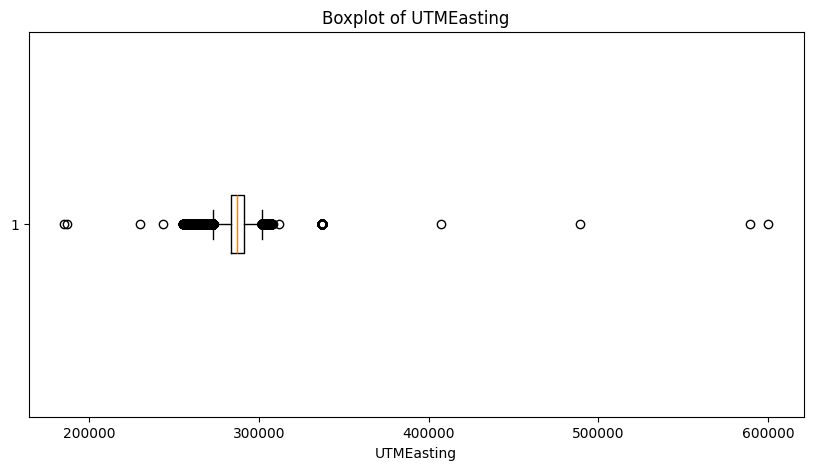

In [26]:
plt.figure(figsize=(10,5))
plt.boxplot(df["UTMEasting"], vert = False)
plt.xlabel("UTMEasting")
plt.title("Boxplot of UTMEasting")
plt.show()

In [27]:
df.groupby("CaseYear")["UTMEasting"].agg(["max","min","mean","median","std","count"])

,max,min,mean,median,std,count
CaseYear,,,,,,
2012,307175.300000,256506.566488,286841.109740,287318.338001,8414.742941,23198
2013,307152.780000,256492.720000,286892.204138,287335.780000,8322.071595,24469
2014,307131.946556,256523.103611,287024.316370,287455.200001,8449.452961,23771
2015,307152.069208,256491.939182,287037.669446,287364.200001,8172.239322,25442
2016,307109.827043,256642.182247,287027.104947,287323.165732,8110.476379,24402
2017,307175.300001,256398.760000,286922.175208,287287.899486,8027.025841,23779
2018,307152.131548,256650.797583,286928.870332,287265.850000,8059.063337,24206
2019,307152.780000,256761.095787,286957.016455,287252.923782,7988.935218,24755
2020,307154.144677,256492.720000,286632.683781,286898.279689,7986.362369,18456


<Figure size 2000x500 with 0 Axes>

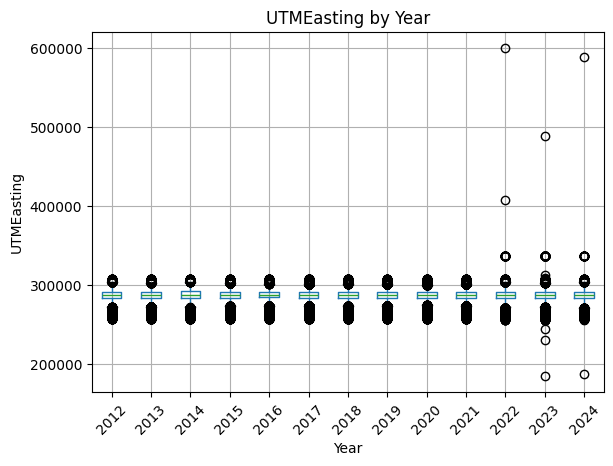

In [28]:
result = df[["CaseYear", "UTMEasting"]].dropna()
plt.figure(figsize=(20, 5))
result.boxplot(column = "UTMEasting", by = "CaseYear", rot = 45)
plt.title("UTMEasting by Year")
plt.suptitle("") 
plt.xlabel("Year")
plt.ylabel("UTMEasting")
plt.show()

In [29]:
monthf = df.groupby(df["CrashDate"].dt.month)["UTMEasting"].agg(["max", "min", "mean", "median", "std", "count"])
monthf.index = monthf.index.map({
    1 : "Jan", 2 : "Feb", 3 : "Mar", 
    4 : "Apr", 5 : "May", 6 : "Jun",
    7 : "Jul", 8 : "Aug", 9 : "Sep", 
    10 : "Oct", 11 : "Nov", 12 : "Dec"
})
monthf.index.name = "Month"
monthf


,max,min,mean,median,std,count
Month,,,,,,
Jan,336980.929917,256492.720000,286901.455057,287271.350000,8466.546876,27299
Feb,336980.929917,256523.103611,286806.261319,287167.790593,8306.325568,25344
Mar,336980.929917,186750.002707,286849.303719,287145.610574,8092.205706,22817
Apr,336980.929917,229900.845115,286854.899826,287241.263524,8070.076593,20179
May,336980.929917,243483.006994,286945.684127,287250.282167,8107.874493,23692
Jun,336980.929917,255465.483259,287189.322043,287389.697189,8061.298249,23706
Jul,336980.929917,256655.001950,287167.169572,287424.809439,8055.728111,22449
Aug,488862.580404,255465.483259,286987.112926,287270.508530,8198.620609,22356
Sep,336980.929917,255465.483259,286874.658629,287233.330000,8264.784950,23156


<Figure size 2000x500 with 0 Axes>

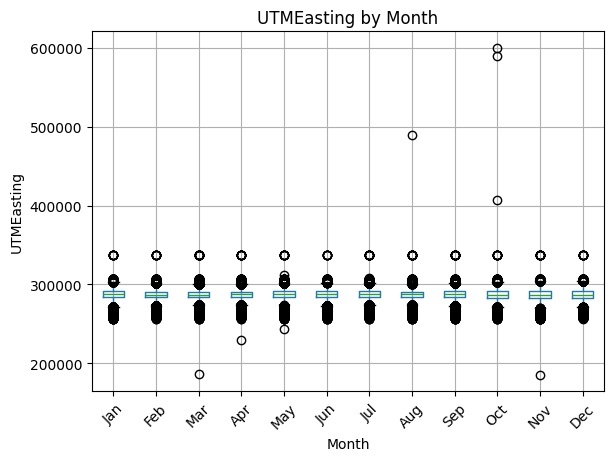

In [30]:
result = df[["CaseMonth", "UTMEasting"]].dropna()
plt.figure(figsize=(20, 5))
ax = result.boxplot(column = "UTMEasting", by = "CaseMonth")
plt.title("UTMEasting by Month")
ax.set_xticklabels(calendar.month_abbr[1:13], rotation=45)
plt.suptitle("") 
plt.xlabel("Month")
plt.ylabel("UTMEasting")
plt.show()

### UTMNorthing

In [31]:
df["UTMNorthing"].dtype

dtype('float64')

In [32]:
#Checking null, total count.unqiue variables
count = len(df["UTMNorthing"])
count

291634

In [33]:
null_count = df["UTMNorthing"].isna().sum()
null_count

0

In [34]:
null_prop = float(null_count/count)
round(null_prop * 100, 3)

0.0

In [35]:
#unique variables
df["UTMNorthing"].nunique()

158655

In [36]:
#data summary
df["UTMNorthing"].agg(["max","min","mean","median","std"])

max       4.805669e+06
min       4.531589e+06
mean      4.781308e+06
median    4.781750e+06
std       6.358762e+03
Name: UTMNorthing, dtype: float64

In [37]:
result = outliercheck("UTMNorthing")
result.head(10)

Q1: 4777889.125036212
Q3: 4785520.60000019
IQR: 7631.474963977933
Lower bound: 4766441.912590245
Upper bound: 4796967.8124461565
Outlier count: 8229


8      4.797712e+06
11     4.764623e+06
49     4.760896e+06
162    4.800167e+06
164    4.799736e+06
192    4.761110e+06
262    4.798119e+06
307    4.758551e+06
322    4.799041e+06
329    4.799803e+06
Name: UTMNorthing, dtype: float64

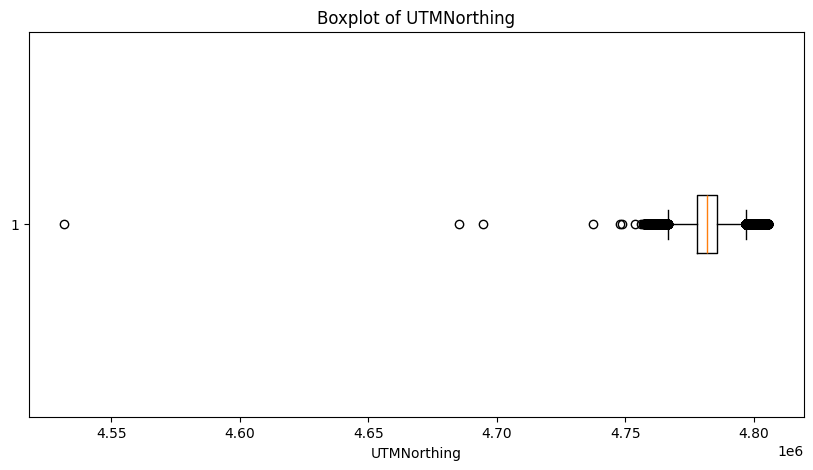

In [38]:
plt.figure(figsize=(10,5))
plt.boxplot(df["UTMNorthing"], vert = False)
plt.xlabel("UTMNorthing")
plt.title("Boxplot of UTMNorthing")
plt.show()

In [39]:
df.groupby("CaseYear")["UTMNorthing"].agg(["max","min","mean","median","std","count"])

,max,min,mean,median,std,count
CaseYear,,,,,,
2012,4.805512e+06,4.757784e+06,4.781141e+06,4.781517e+06,6456.479786,23198
2013,4.805171e+06,4.757506e+06,4.781101e+06,4.781463e+06,6427.732899,24469
2014,4.805084e+06,4.757946e+06,4.781225e+06,4.781612e+06,6389.298311,23771
2015,4.805504e+06,4.757833e+06,4.781367e+06,4.781760e+06,6268.516624,25442
2016,4.805498e+06,4.757653e+06,4.781330e+06,4.781750e+06,6157.063929,24402
2017,4.805607e+06,4.757672e+06,4.781195e+06,4.781750e+06,6241.376710,23779
2018,4.805596e+06,4.757711e+06,4.781332e+06,4.781764e+06,6223.176966,24206
2019,4.805559e+06,4.757678e+06,4.781320e+06,4.781770e+06,6153.916890,24755
2020,4.805273e+06,4.757781e+06,4.781705e+06,4.782211e+06,6201.192141,18456


<Figure size 2000x500 with 0 Axes>

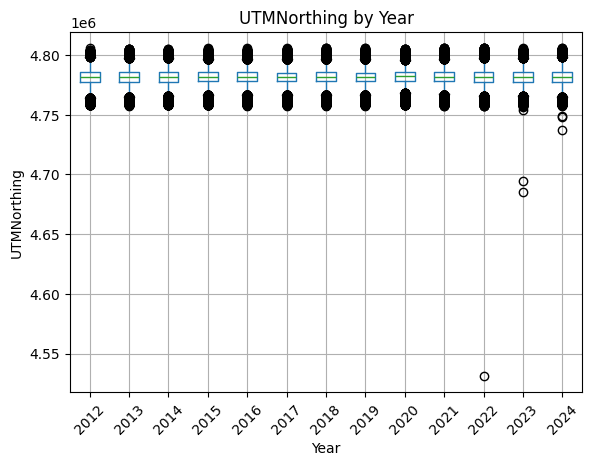

In [40]:
result = df[["CaseYear", "UTMNorthing"]].dropna()
plt.figure(figsize=(20, 5))
result.boxplot(column = "UTMNorthing", by = "CaseYear", rot = 45)
plt.title("UTMNorthing by Year")
plt.suptitle("") 
plt.xlabel("Year")
plt.ylabel("UTMNorthing")
plt.show()

In [41]:

monthf = df.groupby(df["CrashDate"].dt.month)["UTMNorthing"].agg(["max", "min", "mean", "median", "std", "count"])
monthf.index = monthf.index.map({
    1 : "Jan", 2 : "Feb", 3 : "Mar", 
    4 : "Apr", 5 : "May", 6 : "Jun",
    7 : "Jul", 8 : "Aug", 9 : "Sep", 
    10 : "Oct", 11 : "Nov", 12 : "Dec"
})
monthf.index.name = "Month"
monthf


,max,min,mean,median,std,count
Month,,,,,,
Jan,4.805076e+06,4.757739e+06,4.781237e+06,4.781672e+06,6389.443646,27299
Feb,4.805596e+06,4.757678e+06,4.781361e+06,4.781721e+06,6144.620954,25344
Mar,4.804505e+06,4.748612e+06,4.781373e+06,4.781775e+06,6116.555119,22817
Apr,4.805504e+06,4.757957e+06,4.781441e+06,4.781808e+06,6003.261603,20179
May,4.805669e+06,4.753723e+06,4.781432e+06,4.781831e+06,6215.097114,23692
Jun,4.805669e+06,4.748059e+06,4.781436e+06,4.781858e+06,6285.010145,23706
Jul,4.805549e+06,4.757506e+06,4.781542e+06,4.781933e+06,6175.534547,22449
Aug,4.805607e+06,4.694621e+06,4.781480e+06,4.781817e+06,6154.763149,22356
Sep,4.805552e+06,4.756951e+06,4.781349e+06,4.781769e+06,6205.232735,23156


<Figure size 2000x500 with 0 Axes>

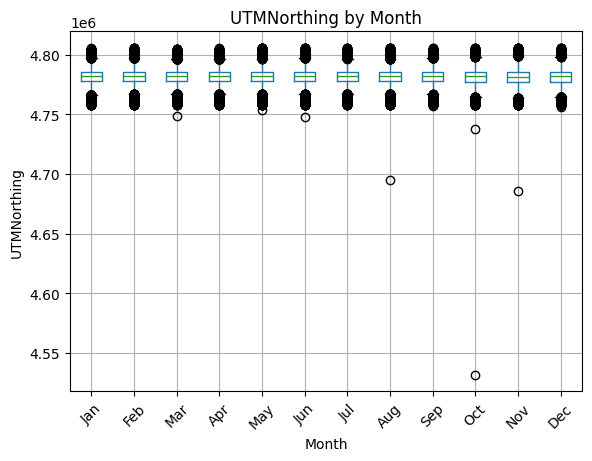

In [42]:
import calendar
result = df[["CaseMonth", "UTMNorthing"]].dropna()
plt.figure(figsize=(20, 5))
ax = result.boxplot(column = "UTMNorthing", by = "CaseMonth")
plt.title("UTMNorthing by Month")
ax.set_xticklabels(calendar.month_abbr[1:13], rotation=45)
plt.suptitle("") 
plt.xlabel("Month")
plt.ylabel("UTMNorthing")
plt.show()

### East & North

In [264]:
#Source: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html & Chatgpt explanation on Grid based
UTM = df[["UTMEasting", "UTMNorthing"]].copy()

size = 100
UTM["East_bin"] = UTM["UTMEasting"] // size
UTM["North_bin"] = UTM["UTMNorthing"] // size

grid = UTM.groupby(["East_bin", "North_bin"], as_index = False).size()
grid["UTMEasting"] = grid["East_bin"] * size + size / 2
grid["UTMNorthing"] = grid["North_bin"] * size + size / 2

p = grid[["UTMEasting", "UTMNorthing"]].to_numpy(dtype = np.float32)

db = DBSCAN(eps= 3000, min_samples= 10, algorithm = "auto")
grid["Label"] = db.fit_predict(p)

grid["isout"] = grid["Label"] == -1
print("Outlier grid count:", int(grid["isout"].sum()))

Outlier grid count: 13


In [44]:
#Label outliers points by grid
UTM_new = UTM.merge(grid[["East_bin","North_bin","isout"]], on = ["East_bin", "North_bin"], how = "left")

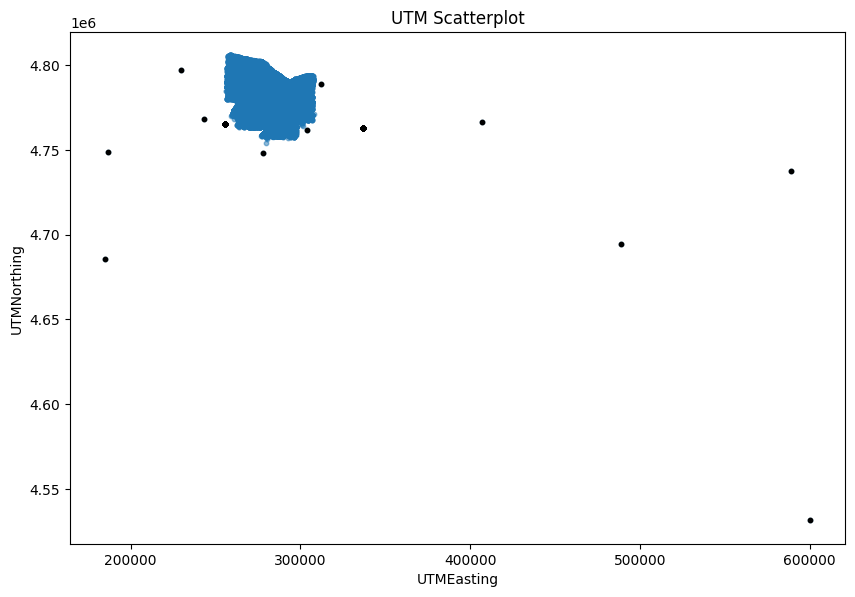

In [45]:
plt.figure(figsize=(10,10))
plt.scatter(UTM["UTMEasting"], UTM["UTMNorthing"], s = 10, alpha = 0.5)
plt.scatter(UTM.loc[UTM_new["isout"],"UTMEasting"],UTM.loc[UTM_new["isout"],"UTMNorthing"], s = 10, alpha = 1, c = "black")
plt.gca().set_aspect('equal', adjustable = 'box')
plt.xlabel("UTMEasting")
plt.ylabel("UTMNorthing")
plt.title("UTM Scatterplot")
plt.show()

In [263]:
print("Outlier count:", len(UTM.loc[UTM_new["isout"]]))

Outlier count: 158


In [46]:
#Source: https://geopandas.org/en/stable/gallery/create_geopandas_from_pandas.html
# https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.to_crs.html
gdf = gpd.GeoDataFrame(UTM,geometry = gpd.points_from_xy(UTM["UTMEasting"], UTM["UTMNorthing"]),crs="EPSG:26918")
#transfrom UTM to web mercator
gdf_new = gdf.to_crs(3857)


In [47]:
# labeling outliers on gdf
gdf_new["isout"] = False
gdf_new.loc[UTM_new.index, "isout"] = UTM_new["isout"].values

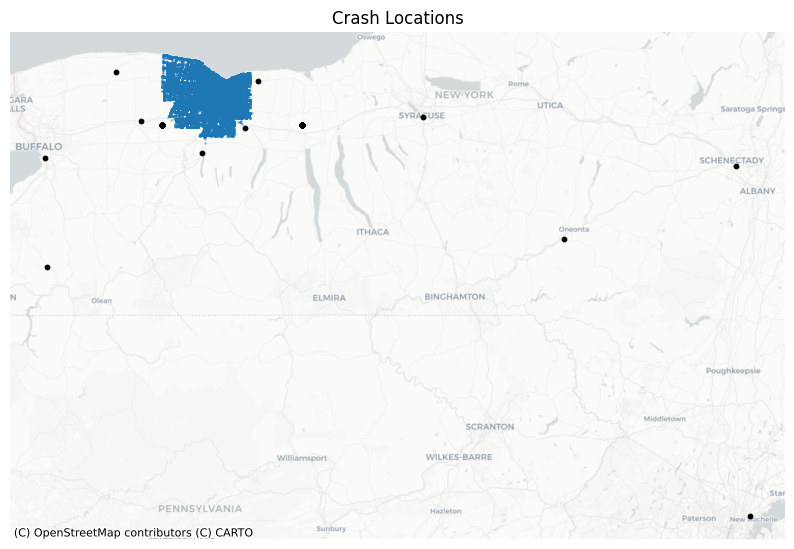

In [48]:
fig, ax = plt.subplots(figsize=(10,10))
gdf_new.plot(
    ax = ax,
    markersize = 1, 
    alpha = 0.3
)

gdf_new.loc[gdf_new["isout"]].plot(
    ax = ax,
    markersize = 10,
    color = "black",
    alpha = 1
)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
ax.set_axis_off()
ax.set_title("Crash Locations")
plt.show()

## CityTownName

In [49]:
df["CityTownName"].dtype

dtype('O')

In [50]:
count = len(df["CityTownName"])
count

291634

In [51]:
null_count = df["CityTownName"].isna().sum()
null_count

19

In [52]:
null_prop = float(null_count/count)
round(null_prop * 100, 3)

0.007

In [53]:
df["CityTownName"].nunique()

28

In [54]:
tdf = df["CityTownName"].copy().fillna("Unknown").astype("string")

In [55]:
tdf.value_counts()

CityTownName
Rochester         115763
Greece             27170
Brighton           20604
Henrietta          18836
Gates              15852
Irondequoit        13879
Penfield           10792
Webster            10491
Perinton           10063
Pittsford           9367
Chili               8243
Ogden               4660
Sweden              4028
Mendon              2844
Parma               2844
Rush                2018
Clarkson            1974
Brockport           1784
Wheatland           1711
East Rochester      1703
Riga                1701
Hamlin              1388
Fairport            1325
Spencerport          985
Hilton               617
Honeoye Falls        428
Scottsville          321
Churchville          224
Unknown               19
Name: count, dtype: Int64

In [56]:
(tdf.value_counts(normalize = True) * 100).round(3)

CityTownName
Rochester         39.695
Greece             9.316
Brighton           7.065
Henrietta          6.459
Gates              5.436
Irondequoit        4.759
Penfield           3.701
Webster            3.597
Perinton           3.451
Pittsford          3.212
Chili              2.826
Ogden              1.598
Sweden             1.381
Mendon             0.975
Parma              0.975
Rush               0.692
Clarkson           0.677
Brockport          0.612
Wheatland          0.587
East Rochester     0.584
Riga               0.583
Hamlin             0.476
Fairport           0.454
Spencerport        0.338
Hilton             0.212
Honeoye Falls      0.147
Scottsville         0.11
Churchville        0.077
Unknown            0.007
Name: proportion, dtype: Float64

In [57]:
tdf = df["CityTownName"].dropna()

In [58]:
#Top citytown
TCT = tdf.value_counts().head(5)
Other = tdf.value_counts().iloc[5:].sum()
TCT

CityTownName
Rochester    115763
Greece        27170
Brighton      20604
Henrietta     18836
Gates         15852
Name: count, dtype: int64

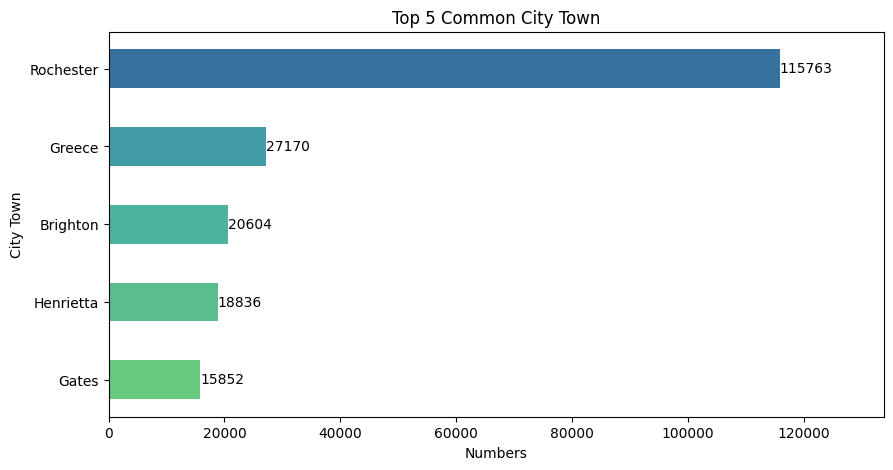

In [59]:
t_labels = TCT[::-1].index
t_values = TCT[::-1].values
t_labels = t_labels.astype(str)
colors = ['#36729e', '#419ca8', '#4db3a1', '#5abd8e', '#68c87d']

plt.figure(figsize=(10, 5))
plt.barh(t_labels, t_values, height=0.5, color = colors[::-1])

for index, j in enumerate(t_values):
    plt.text(j, index, str(j), va= "center", ha= "left", fontsize = 10)

plt.title("Top 5 Common City Town")
plt.xlabel("Numbers")
plt.ylabel("City Town")

axis = plt.gca()
axis.set_xlim(0, axis.get_xlim()[1] * 1.1)
plt.show()


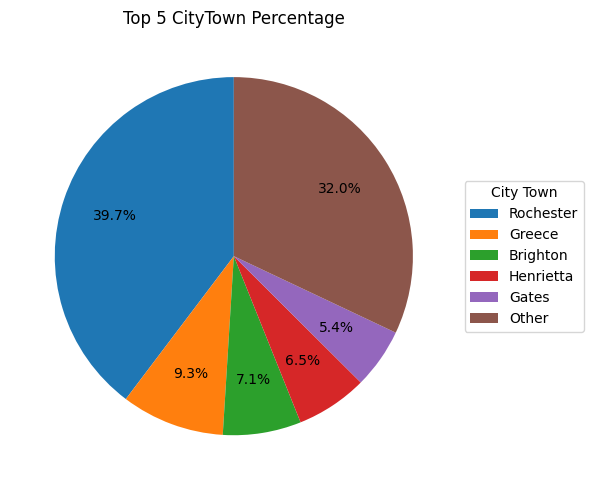

In [60]:
#Source: https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_and_donut_labels.html
pie_data = pd.concat([TCT, pd.Series({"Other": Other})])
fig, ax = plt.subplots(figsize=(10, 5))
wedges,_,_ = ax.pie(
    pie_data.values,
    labels = None,           
    autopct ='%1.1f%%',        
    startangle = 90,
    pctdistance = 0.7
)

ax.legend(wedges, pie_data.index,
          title = "City Town",
          loc = "center left",
          bbox_to_anchor = (1, 0, 0.5, 1))
ax.set_title("Top 5 CityTown Percentage")
plt.tight_layout()
plt.show()

In [61]:
freqtb_y = pd.crosstab(df["CaseYear"], df["CityTownName"])
freqtb_y

CityTownName,Brighton,Brockport,Chili,Churchville,Clarkson,East Rochester,Fairport,Gates,Greece,Hamlin,...,Perinton,Pittsford,Riga,Rochester,Rush,Scottsville,Spencerport,Sweden,Webster,Wheatland
CaseYear,,,,,,,,,,,,,,,,,,,,,
2012,1734,136,745,27,141,150,115,1311,2292,122,...,848,846,157,8270,163,21,94,329,807,117
2013,1871,145,764,13,154,147,110,1321,2232,108,...,874,869,179,9288,163,15,101,315,875,181
2014,1767,133,703,26,136,161,95,1342,2135,136,...,940,846,151,8947,173,38,92,321,976,149
2015,1801,150,647,20,154,124,109,1416,2292,115,...,909,806,143,10218,164,28,102,306,1042,150
2016,1746,155,628,18,143,147,136,1283,2092,105,...,806,739,133,10136,149,30,75,317,908,115
2017,1756,161,580,15,147,112,94,1294,2065,87,...,819,756,142,9858,188,22,76,289,733,145
2018,1687,153,613,16,156,154,103,1332,2271,97,...,803,762,128,10013,164,31,65,298,830,153
2019,1734,151,644,22,177,160,97,1387,2203,98,...,836,767,107,10430,173,25,62,307,842,135
2020,1027,82,516,6,132,92,59,950,1731,88,...,572,458,114,8369,121,21,35,252,595,116


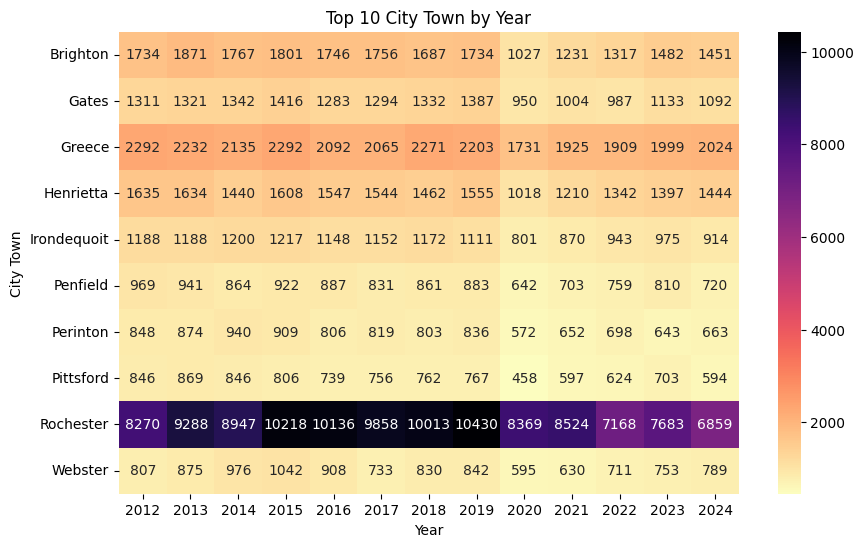

In [62]:
TCT10_i =  df["CityTownName"].value_counts().head(10).index
TCT10 = df[df["CityTownName"].isin(TCT10_i)]
freqtb10_y = pd.crosstab(TCT10["CaseYear"], TCT10["CityTownName"])

plt.figure(figsize=(10, 6))
sns.heatmap(freqtb10_y.T, annot = True, fmt="d", cmap="magma_r")
plt.title("Top 10 City Town by Year")
plt.xlabel("Year")
plt.ylabel("City Town")
plt.show()

In [63]:
ptb_y = (pd.crosstab( df["CaseYear"], df["CityTownName"],normalize = "index") * 100).round(3)
ptb_y

CityTownName,Brighton,Brockport,Chili,Churchville,Clarkson,East Rochester,Fairport,Gates,Greece,Hamlin,...,Perinton,Pittsford,Riga,Rochester,Rush,Scottsville,Spencerport,Sweden,Webster,Wheatland
CaseYear,,,,,,,,,,,,,,,,,,,,,
2012,7.475,0.586,3.212,0.116,0.608,0.647,0.496,5.652,9.881,0.526,...,3.656,3.647,0.677,35.651,0.703,0.091,0.405,1.418,3.479,0.504
2013,7.648,0.593,3.123,0.053,0.629,0.601,0.450,5.400,9.124,0.441,...,3.573,3.552,0.732,37.966,0.666,0.061,0.413,1.288,3.577,0.740
2014,7.434,0.560,2.958,0.109,0.572,0.677,0.400,5.646,8.982,0.572,...,3.955,3.559,0.635,37.641,0.728,0.160,0.387,1.350,4.106,0.627
2015,7.081,0.590,2.544,0.079,0.605,0.488,0.429,5.567,9.012,0.452,...,3.574,3.169,0.562,40.175,0.645,0.110,0.401,1.203,4.097,0.590
2016,7.156,0.635,2.574,0.074,0.586,0.602,0.557,5.258,8.574,0.430,...,3.303,3.029,0.545,41.541,0.611,0.123,0.307,1.299,3.721,0.471
2017,7.385,0.677,2.439,0.063,0.618,0.471,0.395,5.442,8.684,0.366,...,3.444,3.179,0.597,41.457,0.791,0.093,0.320,1.215,3.083,0.610
2018,6.969,0.632,2.532,0.066,0.644,0.636,0.426,5.503,9.382,0.401,...,3.317,3.148,0.529,41.366,0.678,0.128,0.269,1.231,3.429,0.632
2019,7.005,0.610,2.601,0.089,0.715,0.646,0.392,5.603,8.899,0.396,...,3.377,3.098,0.432,42.133,0.699,0.101,0.250,1.240,3.401,0.545
2020,5.565,0.444,2.796,0.033,0.715,0.498,0.320,5.147,9.379,0.477,...,3.099,2.482,0.618,45.346,0.656,0.114,0.190,1.365,3.224,0.629


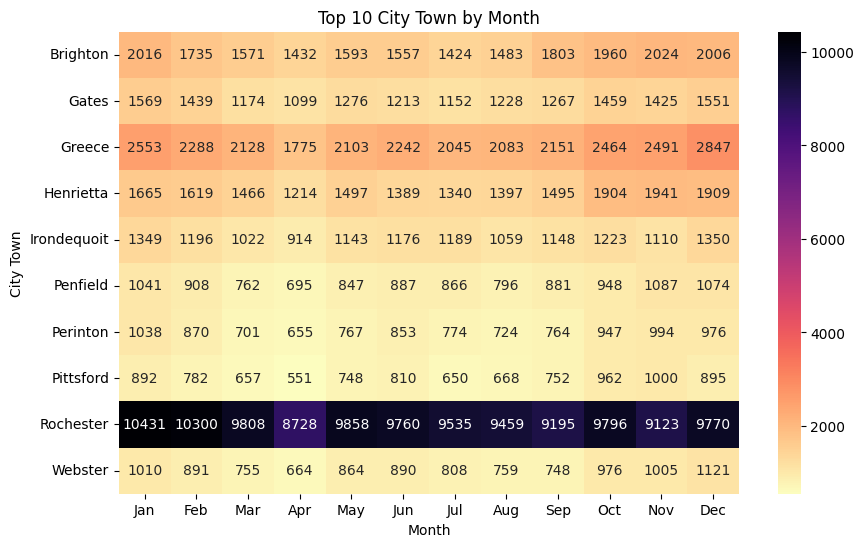

In [64]:
TCT10_i = df["CityTownName"].value_counts().head(10).index
TCT10 = df[df["CityTownName"].isin(TCT10_i)]
freqtb10_y = pd.crosstab(TCT10["CaseMonth"], TCT10["CityTownName"])

plt.figure(figsize=(10, 6))
ax = sns.heatmap(freqtb10_y.T, annot = True, fmt="d", cmap="magma_r")
ax.set_xticklabels(calendar.month_abbr[1:13])
plt.title("Top 10 City Town by Month")
plt.xlabel("Month")
plt.ylabel("City Town")
plt.show()

In [65]:
tcy = freqtb_y.idxmax( axis= 1)
tcy

CaseYear
2012    Rochester
2013    Rochester
2014    Rochester
2015    Rochester
2016    Rochester
2017    Rochester
2018    Rochester
2019    Rochester
2020    Rochester
2021    Rochester
2022    Rochester
2023    Rochester
2024    Rochester
dtype: object

## IntersectionIndicator

In [66]:
df["IntersectionIndicator"].dtype

dtype('int64')

In [67]:
df["IntersectionIndicator"] = df["IntersectionIndicator"].astype(str)

In [68]:
count = len(df["IntersectionIndicator"])
count

291634

In [69]:
null_count = df["IntersectionIndicator"].isna().sum()
null_count

0

In [70]:
null_prop = float(null_count/count)
round(null_prop * 100, 3)

0.0

In [71]:
df["IntersectionIndicator"].nunique()

3

In [72]:
tdf = df["IntersectionIndicator"].copy().fillna("Unknown").astype("string")


In [73]:
tdf.value_counts()

IntersectionIndicator
0    118010
1     99925
2     73699
Name: count, dtype: Int64

In [74]:
(tdf.value_counts(normalize = True) * 100).round(3)

IntersectionIndicator
0    40.465
1    34.264
2    25.271
Name: proportion, dtype: Float64

In [75]:
tdf = df["IntersectionIndicator"].dropna()

In [76]:
#Top InID
TCT = tdf.value_counts().head(5)
Other = tdf.value_counts().iloc[5:].sum()
TCT

IntersectionIndicator
0    118010
1     99925
2     73699
Name: count, dtype: int64

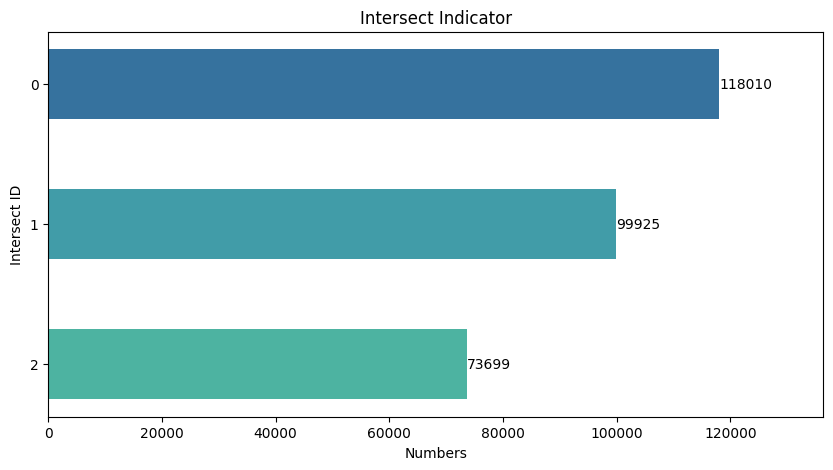

In [77]:
t_labels = TCT[::-1].index
t_values = TCT[::-1].values
t_labels = t_labels.astype(str)
colors = ['#36729e', '#419ca8', '#4db3a1']

plt.figure(figsize=(10, 5))
plt.barh(t_labels, t_values, height=0.5, color = colors[::-1])

for index, j in enumerate(t_values):
    plt.text(j, index, str(j), va= "center", ha= "left", fontsize = 10)

plt.title("Intersect Indicator")
plt.xlabel("Numbers")
plt.ylabel("Intersect ID")

axis = plt.gca()
axis.set_xlim(0, axis.get_xlim()[1] * 1.1)
plt.show()


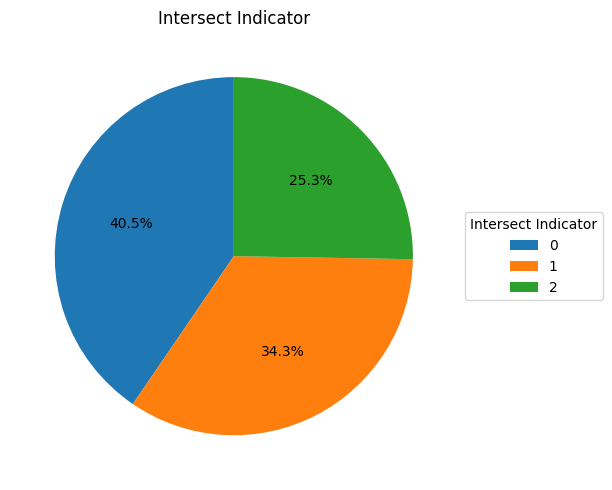

In [78]:
#Source: https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_and_donut_labels.html
pie_data = TCT
fig, ax = plt.subplots(figsize=(10, 5))
wedges,_,_ = ax.pie(
    pie_data.values,
    labels = None,           
    autopct ='%1.1f%%',        
    startangle = 90,
    pctdistance = 0.6
)

ax.legend(wedges, pie_data.index,
          title = "Intersect Indicator",
          loc = "center left",
          bbox_to_anchor = (1, 0, 0.5, 1))
ax.set_title("Intersect Indicator")
plt.tight_layout()
plt.show()

In [79]:
freqtb_y = pd.crosstab(df["CaseYear"], df["IntersectionIndicator"])
freqtb_y

IntersectionIndicator,0,1,2
CaseYear,,,
2012,9711,6938,6549
2013,10211,7447,6811
2014,9891,7354,6526
2015,10541,7914,6987
2016,9225,8320,6857
2017,8909,8447,6423
2018,9319,8097,6790
2019,9650,8329,6776
2020,7074,6580,4802


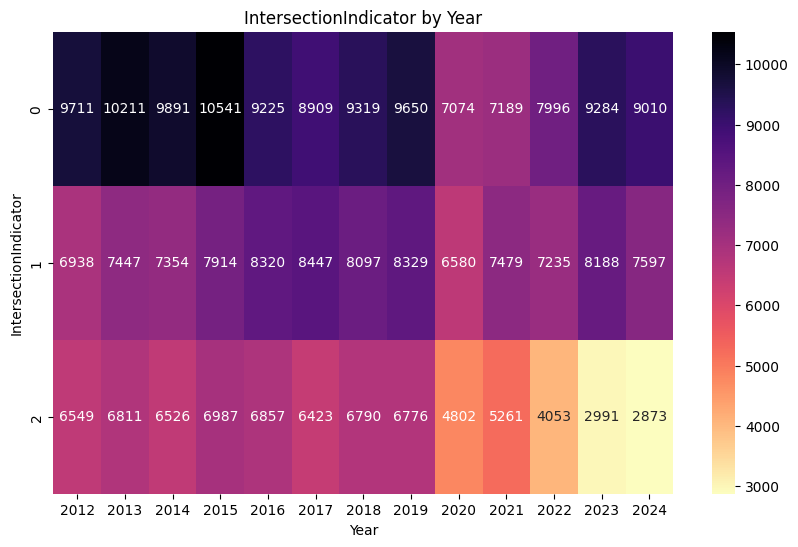

In [80]:
TCT10_i =  df["IntersectionIndicator"].value_counts().head(10).index
TCT10 = df[df["IntersectionIndicator"].isin(TCT10_i)]
freqtb10_y = pd.crosstab(TCT10["CaseYear"], TCT10["IntersectionIndicator"])

plt.figure(figsize=(10, 6))
sns.heatmap(freqtb10_y.T, annot = True, fmt="d", cmap="magma_r")
plt.title("IntersectionIndicator by Year")
plt.xlabel("Year")
plt.ylabel("IntersectionIndicator")
plt.show()

In [81]:
ptb_y = (pd.crosstab( df["CaseYear"], df["IntersectionIndicator"],normalize = "index") * 100).round(3)
ptb_y

IntersectionIndicator,0,1,2
CaseYear,,,
2012,41.861,29.908,28.231
2013,41.730,30.434,27.835
2014,41.610,30.937,27.454
2015,41.431,31.106,27.462
2016,37.804,34.096,28.100
2017,37.466,35.523,27.011
2018,38.499,33.450,28.051
2019,38.982,33.646,27.372
2020,38.329,35.652,26.019


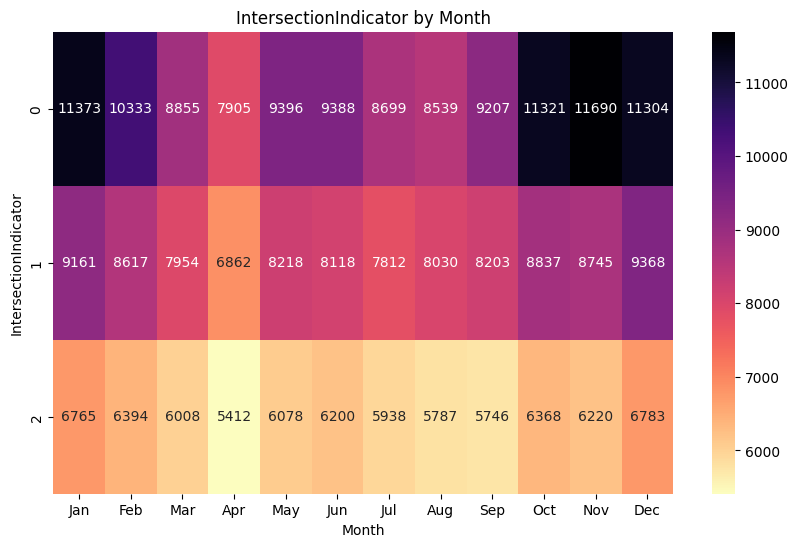

In [82]:
TCT10_i = df["IntersectionIndicator"].value_counts().head(10).index
TCT10 = df[df["IntersectionIndicator"].isin(TCT10_i)]
freqtb10_y = pd.crosstab(TCT10["CaseMonth"], TCT10["IntersectionIndicator"])

plt.figure(figsize=(10, 6))
ax = sns.heatmap(freqtb10_y.T, annot = True, fmt="d", cmap="magma_r")
ax.set_xticklabels(calendar.month_abbr[1:13])
plt.title("IntersectionIndicator by Month")
plt.xlabel("Month")
plt.ylabel("IntersectionIndicator")
plt.show()

In [83]:
tcy = freqtb_y.idxmax( axis= 1)
tcy

CaseYear
2012    0
2013    0
2014    0
2015    0
2016    0
2017    0
2018    0
2019    0
2020    0
2021    1
2022    0
2023    0
2024    0
dtype: object

## On Street

In [84]:
df["OnStreet"].dtype

dtype('O')

In [85]:
count = len(df["OnStreet"])
count

291634

In [86]:
null_count = df["OnStreet"].isna().sum()
null_count

3575

In [87]:
null_prop = float(null_count/count)
round(null_prop * 100, 3)

1.226

In [88]:
df["OnStreet"].nunique()

9000

In [89]:
tdf = df["OnStreet"].copy().fillna("Unknown").astype(str)


In [90]:
tdf.value_counts()

OnStreet
I 490                 8361
W Ridge Rd            5372
Monroe Ave            4540
Lake Ave              4214
Dewey Ave             4046
                      ... 
Telephone Road Ext       1
Pineview Dr              1
Ivy Cottage Ln           1
James Moore Cir          1
Laura Drive              1
Name: count, Length: 9001, dtype: int64

In [91]:
(tdf.value_counts(normalize = True) * 100).round(3)

OnStreet
I 490                 2.867
W Ridge Rd            1.842
Monroe Ave            1.557
Lake Ave              1.445
Dewey Ave             1.387
                      ...  
Telephone Road Ext    0.000
Pineview Dr           0.000
Ivy Cottage Ln        0.000
James Moore Cir       0.000
Laura Drive           0.000
Name: proportion, Length: 9001, dtype: float64

In [92]:
tdf = df["OnStreet"].dropna()

In [93]:
#Top citytown
TCT = tdf.value_counts().head(5)
Other = tdf.value_counts().iloc[5:].sum()
TCT

OnStreet
I 490         8361
W Ridge Rd    5372
Monroe Ave    4540
Lake Ave      4214
Dewey Ave     4046
Name: count, dtype: int64

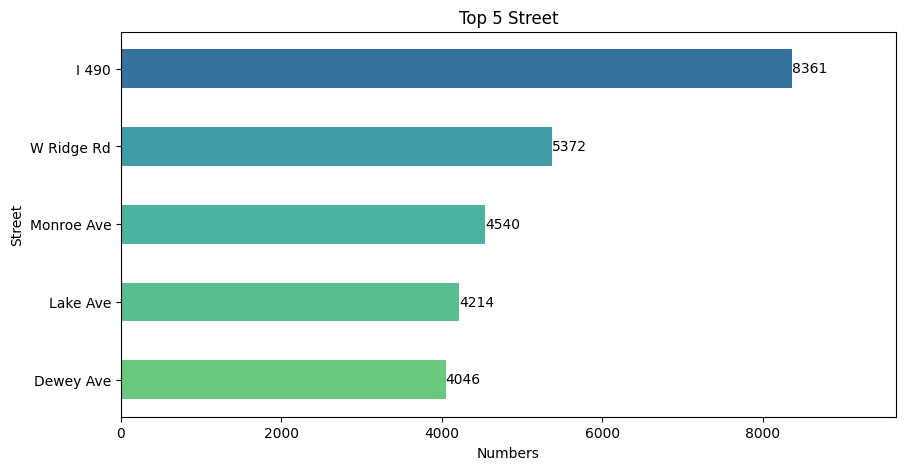

In [94]:
t_labels = TCT[::-1].index
t_values = TCT[::-1].values
t_labels = t_labels.astype(str)
colors = ['#36729e', '#419ca8', '#4db3a1', '#5abd8e', '#68c87d']

plt.figure(figsize=(10, 5))
plt.barh(t_labels, t_values, height=0.5, color = colors[::-1])

for index, j in enumerate(t_values):
    plt.text(j, index, str(j), va= "center", ha= "left", fontsize = 10)

plt.title("Top 5 Street")
plt.xlabel("Numbers")
plt.ylabel("Street")

axis = plt.gca()
axis.set_xlim(0, axis.get_xlim()[1] * 1.1)
plt.show()


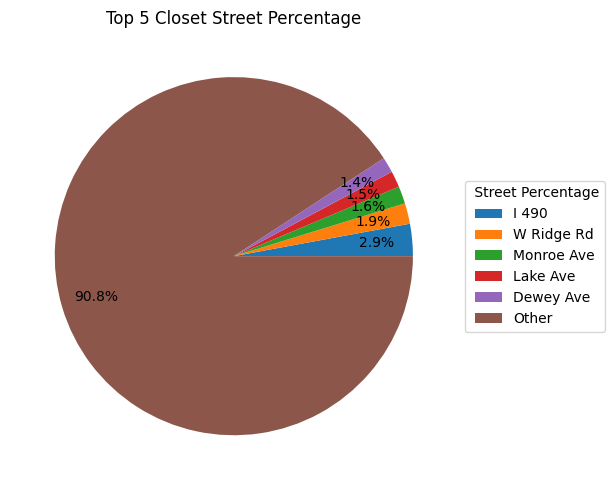

In [95]:
#Source: https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_and_donut_labels.html
pie_data = pd.concat([TCT, pd.Series({"Other": Other})])
fig, ax = plt.subplots(figsize=(10, 5))
wedges,_,_ = ax.pie(
    pie_data.values,
    labels = None,           
    autopct ='%1.1f%%',        
    pctdistance = 0.8
)

ax.legend(wedges, pie_data.index,
          title = " Street Percentage",
          loc = "center left",
          bbox_to_anchor = (1, 0, 0.5, 1))
ax.set_title("Top 5 Closet Street Percentage")
plt.tight_layout()
plt.show()

In [96]:
freqtb_y = pd.crosstab(df["CaseYear"], df["OnStreet"])
freqtb_y

OnStreet,104,15A,1St St,1St Street,251,2Nd Ave,2Nd St,2Nd Street,31F,33,...,[Route] 52,[Route] 531,[Route] 590,[Route] 64,[Route] 65,[Route] 70,[Route] 71,[Route] 90,[Route] 940T,[Route] 96
CaseYear,,,,,,,,,,,,,,,,,,,,,
2012,0,0,7,0,0,0,3,0,0,0,...,0,37,48,8,11,0,0,0,0,12
2013,0,0,6,0,0,0,1,0,0,0,...,0,41,111,15,19,0,0,3,0,34
2014,0,0,14,0,0,0,1,0,0,0,...,1,49,154,14,6,1,0,1,0,21
2015,0,0,9,0,0,0,2,0,1,0,...,0,59,124,10,5,0,0,1,0,29
2016,1,0,8,0,0,0,2,0,0,0,...,0,60,118,11,14,0,0,3,0,31
2017,2,0,3,0,0,0,0,0,0,0,...,0,38,124,11,5,0,1,2,0,17
2018,1,0,12,0,1,0,2,0,0,0,...,0,46,102,14,12,0,0,1,0,11
2019,1,0,13,0,0,0,1,0,0,1,...,0,37,82,17,6,0,0,2,0,6
2020,0,0,8,0,0,1,3,0,0,0,...,0,31,46,8,2,0,0,1,0,5


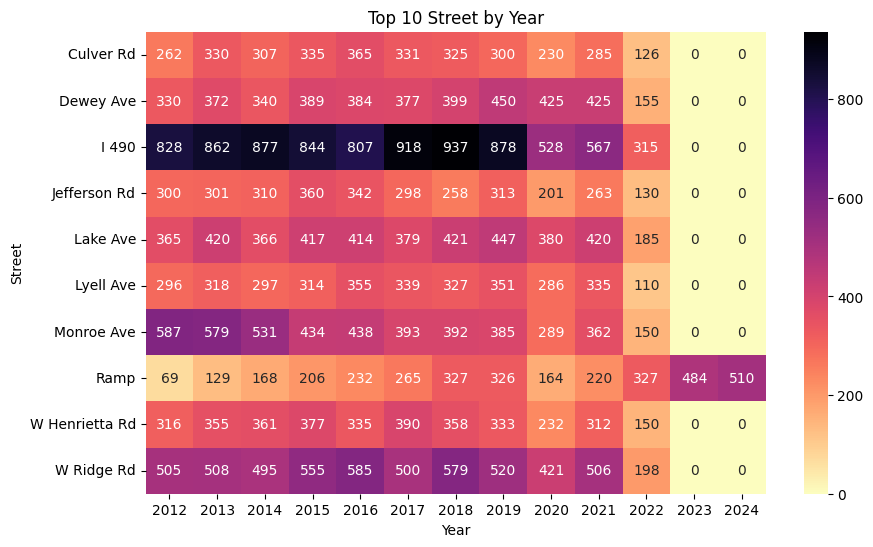

In [97]:
TCT10_i = df["OnStreet"].value_counts().head(10).index
TCT10 = df[df["OnStreet"].isin(TCT10_i)]
freqtb10_y = pd.crosstab(TCT10["CaseYear"], TCT10["OnStreet"])

plt.figure(figsize=(10, 6))
sns.heatmap(freqtb10_y.T, annot = True, fmt="d", cmap="magma_r")
plt.title("Top 10 Street by Year")
plt.xlabel("Year")
plt.ylabel("Street")
plt.show()

In [98]:
ptb_y = (pd.crosstab( df["CaseYear"], df["OnStreet"],normalize = "index") * 100).round(3)
ptb_y

OnStreet,104,15A,1St St,1St Street,251,2Nd Ave,2Nd St,2Nd Street,31F,33,...,[Route] 52,[Route] 531,[Route] 590,[Route] 64,[Route] 65,[Route] 70,[Route] 71,[Route] 90,[Route] 940T,[Route] 96
CaseYear,,,,,,,,,,,,,,,,,,,,,
2012,0.000,0.000,0.030,0.000,0.000,0.000,0.013,0.000,0.000,0.000,...,0.000,0.161,0.208,0.035,0.048,0.000,0.000,0.000,0.000,0.052
2013,0.000,0.000,0.025,0.000,0.000,0.000,0.004,0.000,0.000,0.000,...,0.000,0.169,0.458,0.062,0.078,0.000,0.000,0.012,0.000,0.140
2014,0.000,0.000,0.059,0.000,0.000,0.000,0.004,0.000,0.000,0.000,...,0.004,0.208,0.654,0.059,0.025,0.004,0.000,0.004,0.000,0.089
2015,0.000,0.000,0.036,0.000,0.000,0.000,0.008,0.000,0.004,0.000,...,0.000,0.237,0.499,0.040,0.020,0.000,0.000,0.004,0.000,0.117
2016,0.004,0.000,0.033,0.000,0.000,0.000,0.008,0.000,0.000,0.000,...,0.000,0.250,0.492,0.046,0.058,0.000,0.000,0.013,0.000,0.129
2017,0.008,0.000,0.013,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.161,0.526,0.047,0.021,0.000,0.004,0.008,0.000,0.072
2018,0.004,0.000,0.050,0.000,0.004,0.000,0.008,0.000,0.000,0.000,...,0.000,0.192,0.426,0.058,0.050,0.000,0.000,0.004,0.000,0.046
2019,0.004,0.000,0.053,0.000,0.000,0.000,0.004,0.000,0.000,0.004,...,0.000,0.151,0.334,0.069,0.024,0.000,0.000,0.008,0.000,0.024
2020,0.000,0.000,0.044,0.000,0.000,0.005,0.016,0.000,0.000,0.000,...,0.000,0.169,0.251,0.044,0.011,0.000,0.000,0.005,0.000,0.027


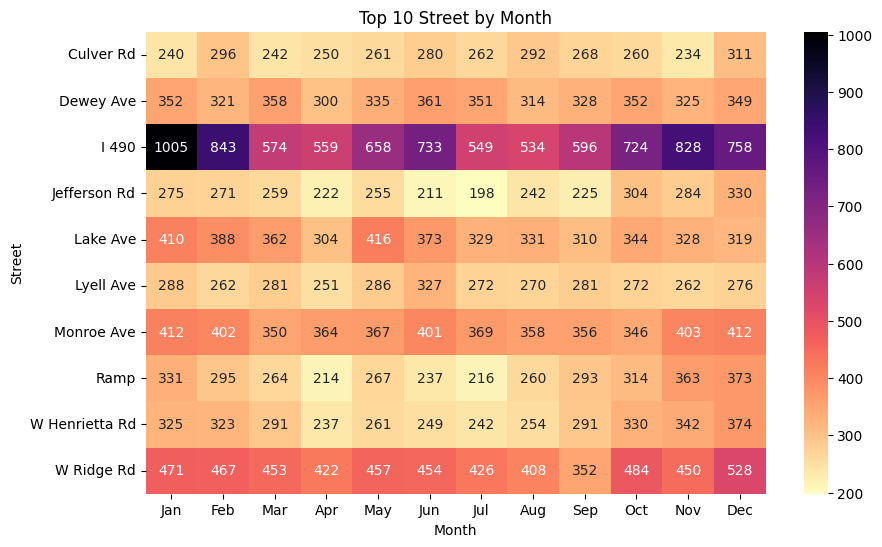

In [99]:
TCT10_i = df["OnStreet"].value_counts().head(10).index
TCT10 = df[df["OnStreet"].isin(TCT10_i)]
freqtb10_y = pd.crosstab(TCT10["CaseMonth"], TCT10["OnStreet"])

plt.figure(figsize=(10, 6))
ax = sns.heatmap(freqtb10_y.T, annot = True, fmt="d", cmap="magma_r")
ax.set_xticklabels(calendar.month_abbr[1:13])
plt.title("Top 10 Street by Month")
plt.xlabel("Month")
plt.ylabel("Street")
plt.show()

In [100]:
tcy = freqtb_y.idxmax( axis= 1)
tcy

CaseYear
2012    I 490
2013    I 490
2014    I 490
2015    I 490
2016    I 490
2017    I 490
2018    I 490
2019    I 490
2020    I 490
2021    I 490
2022     Ramp
2023     Ramp
2024     Ramp
dtype: object

## Town & Street


In [101]:
# freqtb_y = pd.crosstab(df["CityTownName"], df["OnStreet"])
# freqtb_y

In [102]:
# ptb_y = (pd.crosstab( df["CityTownName"], df["OnStreet"],normalize = "index") * 100).round(3)
# ptb_y

In [103]:
tdf = df["CityTownName"].copy().fillna("Unknown").astype("string")
TCT5_i = tdf.value_counts().head(5).index
TCT5 = df[tdf.isin(TCT5_i)]
freqtb5_y = pd.crosstab(TCT5["CityTownName"], TCT5["OnStreet"])
freqtb5_y

OnStreet,104,15A,1St St,1St Street,2Nd Ave,2Nd St,2Nd Street,390,3Rd St,3Rd Street,...,[Route] 386,[Route] 390,[Route] 441,[Route] 490,[Route] 531,[Route] 590,[Route] 65,[Route] 71,[Route] 90,[Route] 940T
CityTownName,,,,,,,,,,,,,,,,,,,,,
Brighton,0,0,0,0,0,0,0,2,0,0,...,0,550,252,418,0,634,2,0,0,0
Gates,0,0,1,1,0,1,0,0,0,0,...,31,692,0,345,116,0,0,0,0,0
Greece,0,0,0,0,1,0,0,0,0,0,...,1,277,0,0,0,0,0,0,0,0
Henrietta,0,1,0,0,0,0,0,0,0,0,...,0,498,0,0,0,0,0,1,13,0
Rochester,1,0,88,10,0,14,4,0,20,2,...,0,76,0,312,0,111,0,0,0,3


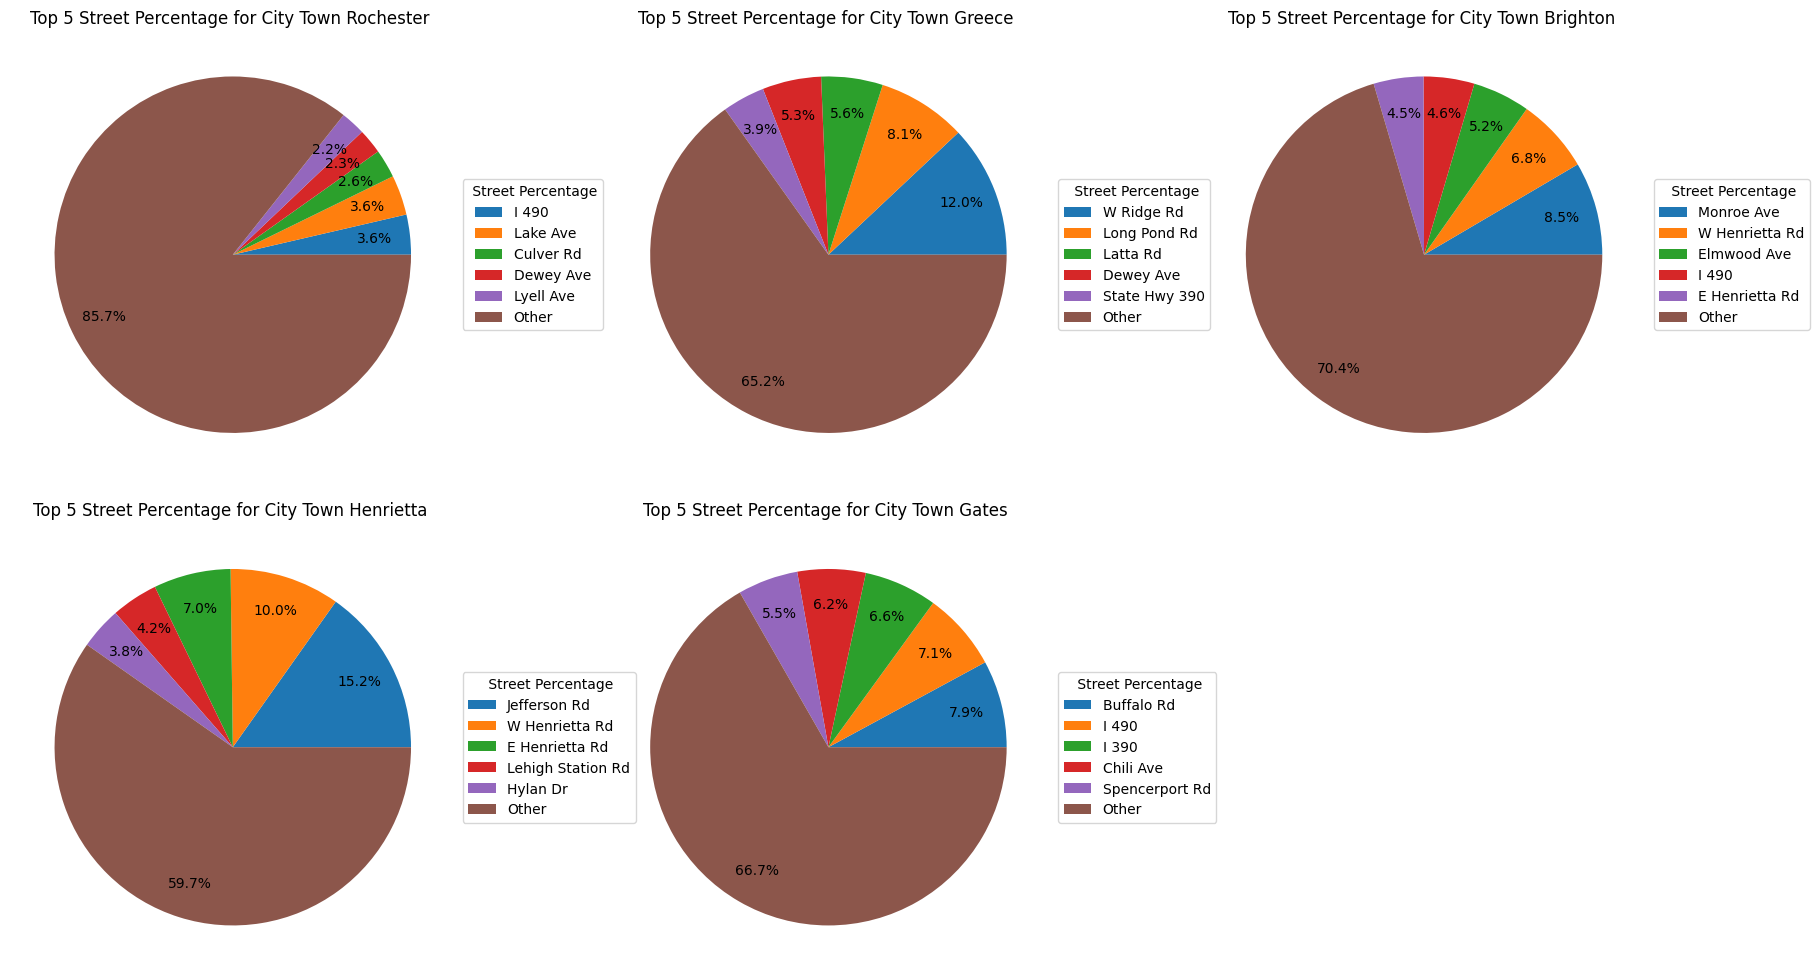

In [104]:
#Source: https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_and_donut_labels.html
fig, axes = plt.subplots(2, 3, figsize=(18, 10)) 
axes = axes.flatten()

for i, v in enumerate(TCT5_i): 
    ax = axes[i]
    St_ct = df.loc[df["CityTownName"] == v, "OnStreet"].value_counts()
    T5S = St_ct.head(5)
    Other = St_ct.iloc[5:].sum()
    pie_data = pd.concat([T5S, pd.Series({"Other": Other})])
    wedges,_,_ = ax.pie(
        pie_data.values,
        labels = None,           
        autopct ='%1.1f%%',        
        pctdistance = 0.8
    )

    ax.legend(wedges, pie_data.index,
          title = " Street Percentage",
          loc = "center left",
          bbox_to_anchor = (1, 0, 0.5, 1))
    ax.set_title(f"Top 5 Street Percentage for City Town {v} ")
    
fig.delaxes(axes[5])
plt.tight_layout()
plt.show()

In [105]:
tcy = freqtb10_y.idxmax(axis= 1)
tcy

CaseMonth
1     I 490
2     I 490
3     I 490
4     I 490
5     I 490
6     I 490
7     I 490
8     I 490
9     I 490
10    I 490
11    I 490
12    I 490
dtype: object

## ClosestCrossStreet

In [106]:
df["ClosestCrossStreet"].dtype

dtype('O')

In [107]:
count = len(df["ClosestCrossStreet"])
count

291634

In [108]:
null_count = df["ClosestCrossStreet"].isna().sum()
null_count

40204

In [109]:
null_prop = float(null_count/count)
round(null_prop * 100, 3)

13.786

In [110]:
df["ClosestCrossStreet"].nunique()

10925

In [111]:
tdf = df["ClosestCrossStreet"].copy().fillna("Unknown").astype("string")


In [112]:
tdf.value_counts()

ClosestCrossStreet
Unknown                  40204
Ramp                     21659
Connecting Road           4254
Unnamed Street            3673
Parking Lot               3393
                         ...  
Blue Ridge Trail             1
County Fair Drive            1
Whitestone Lane North        1
Middlebury Road              1
Anglewood Court              1
Name: count, Length: 10926, dtype: Int64

In [113]:
(tdf.value_counts(normalize = True) * 100).round(3)

ClosestCrossStreet
Unknown                  13.786
Ramp                      7.427
Connecting Road           1.459
Unnamed Street            1.259
Parking Lot               1.163
                          ...  
Blue Ridge Trail            0.0
County Fair Drive           0.0
Whitestone Lane North       0.0
Middlebury Road             0.0
Anglewood Court             0.0
Name: proportion, Length: 10926, dtype: Float64

In [114]:
tdf = df["ClosestCrossStreet"].dropna()

In [115]:
TCT = tdf.value_counts().head(5)
Other = tdf.value_counts().iloc[5:].sum()
TCT

ClosestCrossStreet
Ramp               21659
Connecting Road     4254
Unnamed Street      3673
Parking Lot         3393
Driveway            3022
Name: count, dtype: int64

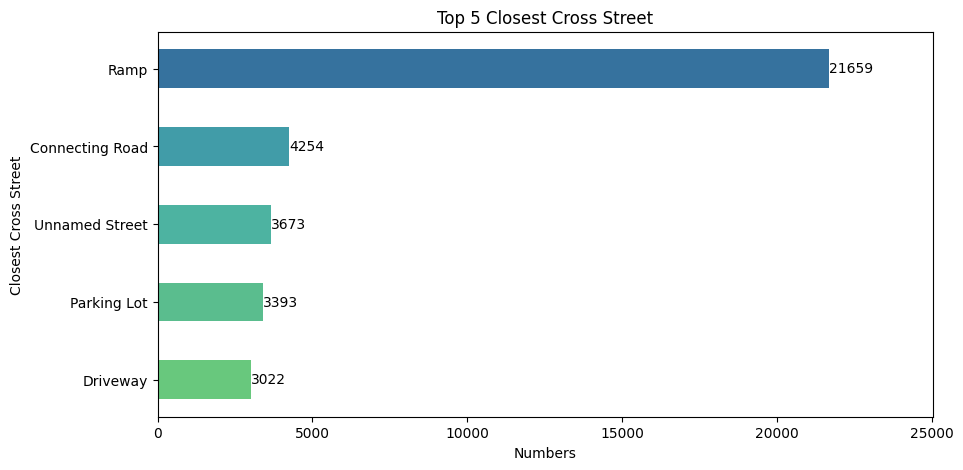

In [116]:
t_labels = TCT[::-1].index
t_values = TCT[::-1].values
t_labels = t_labels.astype(str)
colors = ['#36729e', '#419ca8', '#4db3a1', '#5abd8e', '#68c87d']

plt.figure(figsize=(10, 5))
plt.barh(t_labels, t_values, height=0.5, color = colors[::-1])

for index, j in enumerate(t_values):
    plt.text(j, index, str(j), va= "center", ha= "left", fontsize = 10)

plt.title("Top 5 Closest Cross Street")
plt.xlabel("Numbers")
plt.ylabel("Closest Cross Street")

axis = plt.gca()
axis.set_xlim(0, axis.get_xlim()[1] * 1.1)
plt.show()


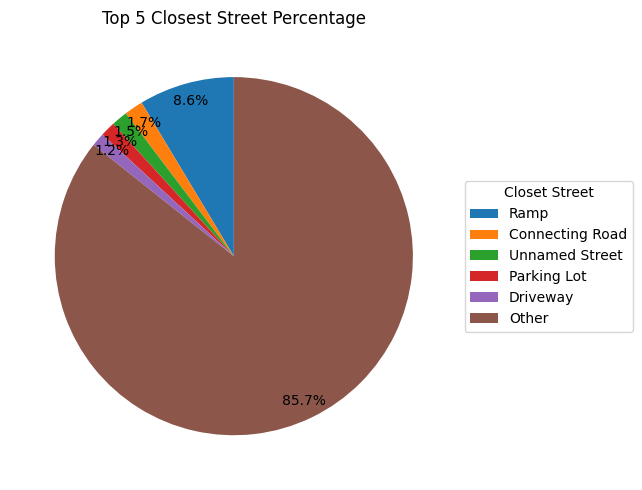

In [117]:
#Source: https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_and_donut_labels.html
pie_data = pd.concat([TCT, pd.Series({"Other": Other})])
fig, ax = plt.subplots(figsize=(10, 5))
wedges,_,_ = ax.pie(
    pie_data.values,
    labels = None,           
    autopct ='%1.1f%%',        
    startangle = 90,
    pctdistance = 0.9
)

ax.legend(wedges, pie_data.index,
          title = "Closet Street",
          loc = "center left",
          bbox_to_anchor = (1, 0, 0.5, 1))
ax.set_title("Top 5 Closest Street Percentage")
plt.tight_layout()
plt.show()

In [118]:
freqtb_y = pd.crosstab(df["CaseYear"], df["ClosestCrossStreet"])
freqtb_y

ClosestCrossStreet,11Th Rd,11Th Road,19,1St St,1St Street,252,259,2Nd Avenue,2Nd St,2Nd Street,...,[Route] 441,[Route] 490,[Route] 531,[Route] 590,[Route] 64,[Route] 65,[Route] 81,[Route] 84,[Route] 90,[Route] 96
CaseYear,,,,,,,,,,,,,,,,,,,,,
2012,0,0,0,13,0,0,0,0,7,0,...,15,0,0,4,3,2,0,0,0,6
2013,0,0,0,15,0,1,0,0,7,0,...,19,1,9,17,4,4,0,0,0,14
2014,0,0,1,17,0,0,0,0,8,0,...,27,2,10,24,6,4,0,0,1,6
2015,0,0,0,17,0,0,0,0,7,0,...,28,2,18,19,2,3,1,1,0,17
2016,0,0,0,14,0,0,0,0,5,0,...,23,2,7,7,6,1,0,0,0,10
2017,0,0,0,17,0,0,0,0,5,0,...,28,0,16,21,4,0,0,0,0,8
2018,0,0,0,23,0,0,0,0,8,0,...,18,2,10,17,3,1,0,0,1,9
2019,0,0,0,16,0,0,0,0,6,0,...,14,1,11,9,3,4,0,0,0,6
2020,1,0,0,14,0,0,0,0,11,0,...,9,0,6,11,1,0,0,0,0,4


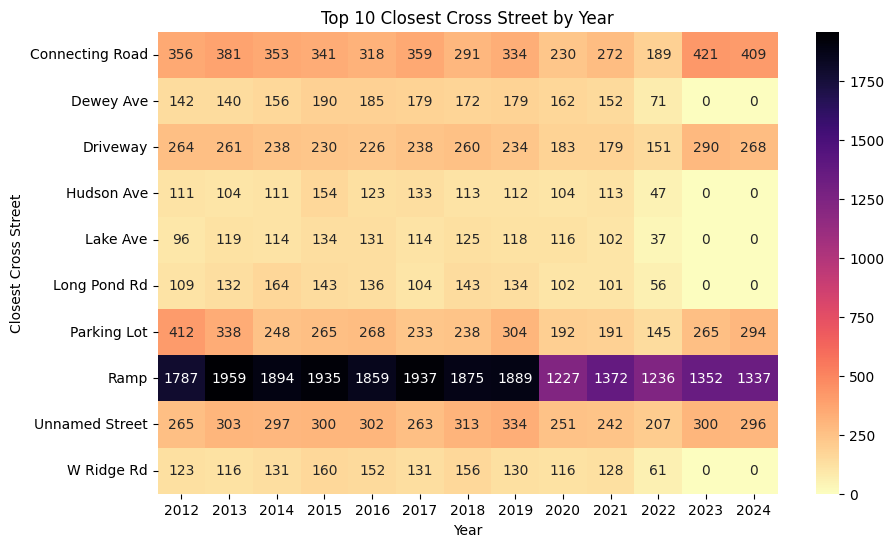

In [119]:
TCT10_i = df["ClosestCrossStreet"].value_counts().head(10).index
TCT10 = df[df["ClosestCrossStreet"].isin(TCT10_i)]
freqtb10_y = pd.crosstab(TCT10["CaseYear"], TCT10["ClosestCrossStreet"])

plt.figure(figsize=(10, 6))
sns.heatmap(freqtb10_y.T, annot = True, fmt="d", cmap="magma_r")
plt.title("Top 10 Closest Cross Street by Year")
plt.xlabel("Year")
plt.ylabel("Closest Cross Street")
plt.show()

In [120]:
ptb_y = (pd.crosstab( df["CaseYear"], df["ClosestCrossStreet"],normalize = "index") * 100).round(3)
ptb_y

ClosestCrossStreet,11Th Rd,11Th Road,19,1St St,1St Street,252,259,2Nd Avenue,2Nd St,2Nd Street,...,[Route] 441,[Route] 490,[Route] 531,[Route] 590,[Route] 64,[Route] 65,[Route] 81,[Route] 84,[Route] 90,[Route] 96
CaseYear,,,,,,,,,,,,,,,,,,,,,
2012,0.000,0.000,0.000,0.064,0.000,0.000,0.000,0.000,0.035,0.000,...,0.074,0.000,0.000,0.020,0.015,0.010,0.000,0.000,0.000,0.030
2013,0.000,0.000,0.000,0.072,0.000,0.005,0.000,0.000,0.033,0.000,...,0.091,0.005,0.043,0.081,0.019,0.019,0.000,0.000,0.000,0.067
2014,0.000,0.000,0.005,0.085,0.000,0.000,0.000,0.000,0.040,0.000,...,0.135,0.010,0.050,0.120,0.030,0.020,0.000,0.000,0.005,0.030
2015,0.000,0.000,0.000,0.080,0.000,0.000,0.000,0.000,0.033,0.000,...,0.131,0.009,0.084,0.089,0.009,0.014,0.005,0.005,0.000,0.080
2016,0.000,0.000,0.000,0.066,0.000,0.000,0.000,0.000,0.023,0.000,...,0.108,0.009,0.033,0.033,0.028,0.005,0.000,0.000,0.000,0.047
2017,0.000,0.000,0.000,0.081,0.000,0.000,0.000,0.000,0.024,0.000,...,0.133,0.000,0.076,0.100,0.019,0.000,0.000,0.000,0.000,0.038
2018,0.000,0.000,0.000,0.109,0.000,0.000,0.000,0.000,0.038,0.000,...,0.085,0.009,0.047,0.080,0.014,0.005,0.000,0.000,0.005,0.043
2019,0.000,0.000,0.000,0.074,0.000,0.000,0.000,0.000,0.028,0.000,...,0.064,0.005,0.051,0.041,0.014,0.018,0.000,0.000,0.000,0.028
2020,0.006,0.000,0.000,0.086,0.000,0.000,0.000,0.000,0.068,0.000,...,0.056,0.000,0.037,0.068,0.006,0.000,0.000,0.000,0.000,0.025


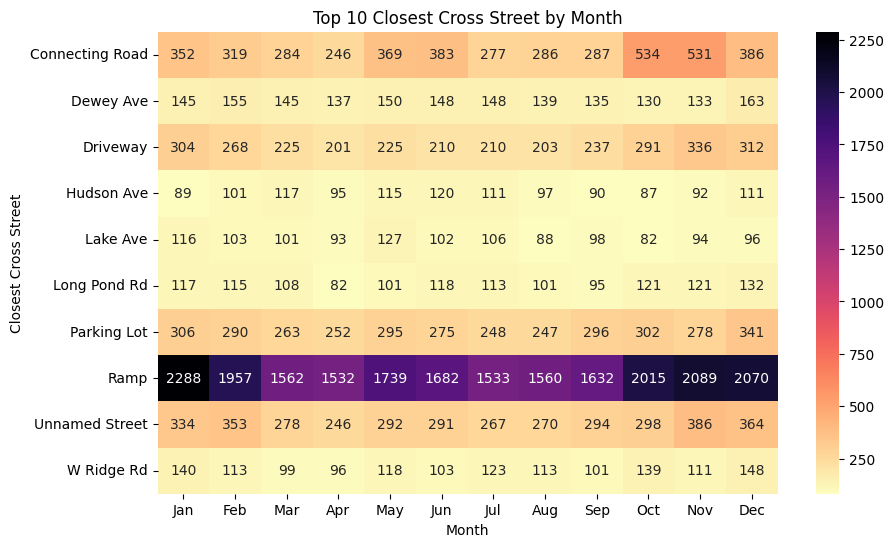

In [121]:
TCT10_i = df["ClosestCrossStreet"].value_counts().head(10).index
TCT10 = df[df["ClosestCrossStreet"].isin(TCT10_i)]
freqtb10_y = pd.crosstab(TCT10["CaseMonth"], TCT10["ClosestCrossStreet"])

plt.figure(figsize=(10, 6))
ax = sns.heatmap(freqtb10_y.T, annot = True, fmt="d", cmap="magma_r")
ax.set_xticklabels(calendar.month_abbr[1:13])
plt.title("Top 10 Closest Cross Street by Month")
plt.xlabel("Month")
plt.ylabel("Closest Cross Street")
plt.show()

In [122]:
tcy = freqtb_y.idxmax( axis= 1)
tcy

CaseYear
2012    Ramp
2013    Ramp
2014    Ramp
2015    Ramp
2016    Ramp
2017    Ramp
2018    Ramp
2019    Ramp
2020    Ramp
2021    Ramp
2022    Ramp
2023    Ramp
2024    Ramp
dtype: object

## DistanceFromIntersection

In [123]:
df["DistanceFromIntersection"].dtype

dtype('float64')

In [124]:
count = len(df["DistanceFromIntersection"])
count

291634

In [125]:
null_count = df["DistanceFromIntersection"].isna().sum()
null_count

33

In [126]:
null_prop = float(null_count/count)
round(null_prop * 100, 3)

0.011

In [127]:
df["DistanceFromIntersection"].nunique()

23339

In [128]:
#data summary
df["DistanceFromIntersection"].agg(["max","min","mean","median","std"])

max       24779.890381
min           0.000000
mean         95.666563
median        3.000000
std         516.987175
Name: DistanceFromIntersection, dtype: float64

In [129]:
result = pd.to_numeric(df["DistanceFromIntersection"]).dropna()

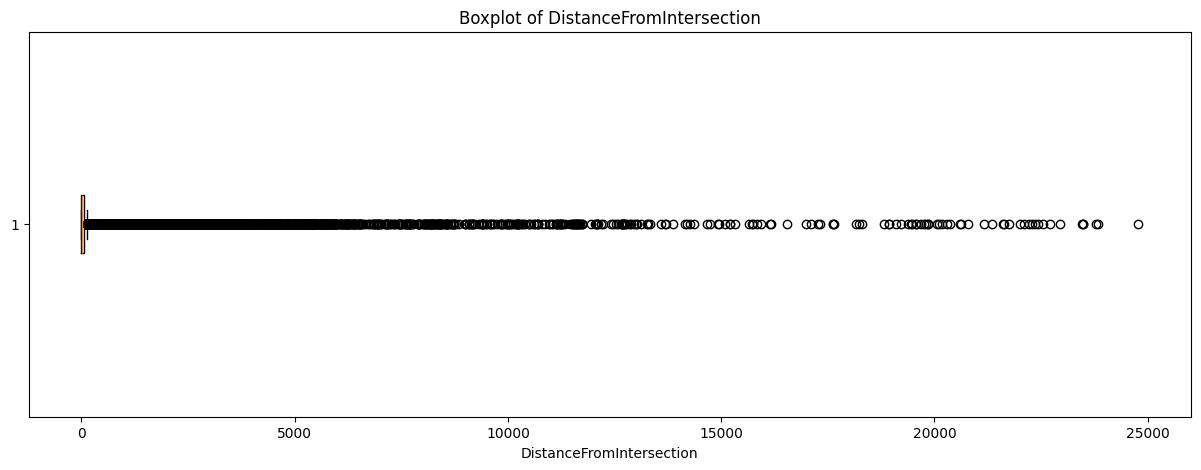

In [130]:
plt.figure(figsize = (15,5))
plt.boxplot(result, vert = False)
plt.xlabel("DistanceFromIntersection")
plt.title("Boxplot of DistanceFromIntersection")
plt.show()

In [131]:
df.groupby("CaseYear")["DistanceFromIntersection"].agg(["max","min","mean","median","std","count"])

,max,min,mean,median,std,count
CaseYear,,,,,,
2012,3504.000000,0.0,50.414044,6.000000,126.890098,23198
2013,6541.000000,0.0,47.591851,3.000000,132.405135,24469
2014,2689.000000,0.0,44.811199,0.000000,115.069901,23771
2015,2770.000000,0.0,42.166418,0.000000,109.476060,25442
2016,2997.596973,0.0,41.041636,1.000000,104.612955,24401
2017,2395.000000,0.0,43.270567,0.000000,114.264919,23779
2018,2637.000000,0.0,42.623733,1.000000,111.559508,24205
2019,2061.000000,0.0,43.255845,1.000000,108.993778,24754
2020,4100.000000,0.0,43.224179,1.000000,116.736603,18455


<Figure size 2000x500 with 0 Axes>

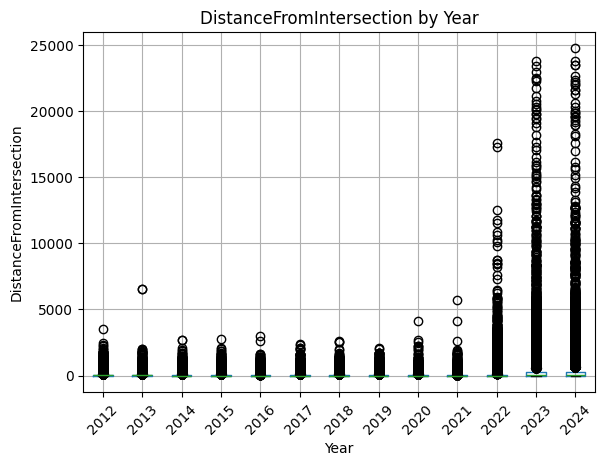

In [132]:
result = df[["CaseYear", "DistanceFromIntersection"]].dropna()
plt.figure(figsize=(20, 5))
result.boxplot(column = "DistanceFromIntersection", by = "CaseYear", rot = 45)
plt.title("DistanceFromIntersection by Year")
plt.suptitle("") 
plt.xlabel("Year")
plt.ylabel("DistanceFromIntersection")
plt.show()

In [133]:
import calendar

monthf = df.groupby(df["CaseMonth"])["DistanceFromIntersection"].agg(["max", "min", "mean", "median", "std", "count"])
monthf.index = monthf.index.map({
    1 : "Jan", 2 : "Feb", 3 : "Mar", 
    4 : "Apr", 5 : "May", 6 : "Jun",
    7 : "Jul", 8 : "Aug", 9 : "Sep", 
    10 : "Oct", 11 : "Nov", 12 : "Dec"
})
monthf.index.name = "Month"
monthf


,max,min,mean,median,std,count
Month,,,,,,
Jan,17656.359629,0.0,82.877565,3.000000,370.133923,27298
Feb,18243.186769,0.0,77.192773,2.000000,369.086736,25341
Mar,23491.788189,0.0,86.107579,3.000000,495.811783,22817
Apr,23468.075059,0.0,88.521614,3.000000,536.873727,20179
May,22539.722082,0.0,97.588447,3.000000,583.679311,23692
Jun,22954.205319,0.0,90.776830,2.000000,538.459767,23705
Jul,24779.890381,0.0,98.744117,1.005413,589.612960,22448
Aug,19578.351733,0.0,86.179557,1.000000,449.741496,22354
Sep,23824.882688,0.0,95.171579,1.000000,536.401227,23151


<Figure size 2000x500 with 0 Axes>

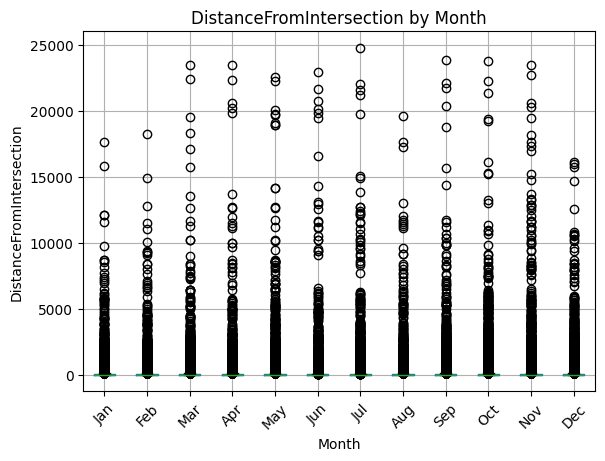

In [134]:
import calendar
result = df[["CaseMonth", "DistanceFromIntersection"]].dropna()
plt.figure(figsize=(20, 5))
ax = result.boxplot(column = "DistanceFromIntersection", by = "CaseMonth")
plt.title("DistanceFromIntersection by Month")
ax.set_xticks(range(1, 13))
ax.set_xticklabels(calendar.month_abbr[1:13], rotation=45)
plt.suptitle("") 
plt.xlabel("Month")
plt.ylabel("DistanceFromIntersection")
plt.show()

In [135]:
result = outliercheck("DistanceFromIntersection")
result.head(10)

Q1: 0.0
Q3: 51.0
IQR: 51.0
Lower bound: -76.5
Upper bound: 127.5
Outlier count: 39839


0     231.0
2     605.0
8     246.0
15    161.0
22    135.0
38    435.0
42    133.0
50    322.0
62    188.0
64    161.0
Name: DistanceFromIntersection, dtype: float64

## DistanceFromIntersection vs DirectionFromIntersection

In [136]:
import calendar

f = df.groupby(df["DirectionFromIntersection"])["DistanceFromIntersection"].agg(["max", "min", "mean", "median", "std", "count"])
f.index.name = "Direction"
f


,max,min,mean,median,std,count
Direction,,,,,,
1.0,8556.287679,0.0,92.072128,15.000000,316.660603,56799
3.0,23824.882688,0.0,469.508467,69.130221,1534.713628,11920
4.0,2520.000000,0.0,42.339168,8.000000,99.600571,51075
5.0,9187.318662,0.0,257.814640,45.791862,664.555299,11220
6.0,45.000000,25.0,35.000000,35.000000,14.142136,2
7.0,24779.890381,0.0,140.536165,15.000000,741.134602,63636
8.0,2770.000000,0.0,57.011247,11.000000,139.222117,53883


ValueError: The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number of labels (8).

<Figure size 2000x500 with 0 Axes>

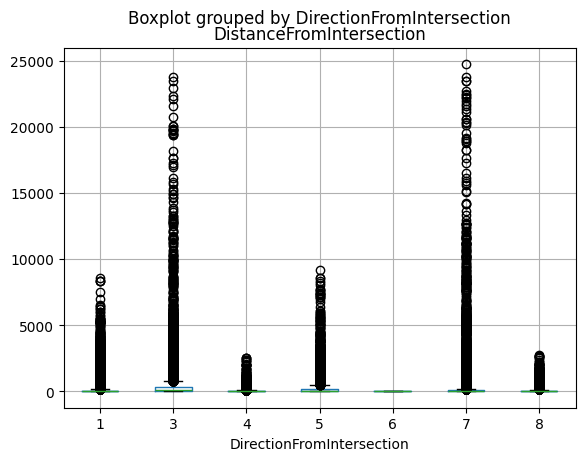

In [266]:
import calendar
result = df[["DirectionFromIntersection", "DistanceFromIntersection"]].dropna()
plt.figure(figsize=(20, 5))
ax = result.boxplot(column = "DistanceFromIntersection", by = "DirectionFromIntersection")
ax.set_xticklabels([1,2,3,4,5,6,7,8])
plt.title("Distance From Intersection by Direction From Intersection")
plt.suptitle("") 
plt.xlabel("Direction From Intersection")
plt.ylabel("Distance From Intersection")
plt.show()

# Other Feature

## CountyFIPS

In [138]:
df["CountyFIPS"].dtype

dtype('int64')

In [139]:
df["CountyFIPS"] = df["CountyFIPS"].astype("string")

In [140]:
df["CountyFIPS"].dtype

string[python]

In [141]:
count = len(df["CountyFIPS"])
count

291634

In [142]:
null_count = df["CountyFIPS"].isna().sum()
null_count

0

In [143]:
null_prop = float(null_count/count)
round(null_prop * 100, 3)

0.0

In [144]:
df["CountyFIPS"].nunique()

1

## CountyName

In [145]:
df["CountyName"].dtype

dtype('O')

In [146]:
count = len(df["CountyName"])
count

291634

In [147]:
null_count = df["CountyName"].isna().sum()
null_count

0

In [148]:
null_prop = float(null_count/count)
round(null_prop * 100, 3)

0.0

In [149]:
df["CountyName"].nunique()

1

In [150]:
df["CountyName"].head(1)

0    Monroe
Name: CountyName, dtype: object

## MuniFIPS

In [151]:
df["MuniFIPS"]

0         3.605579e+09
1         3.605538e+09
2         3.605516e+09
3         3.605534e+09
4         3.605557e+09
              ...     
291629    3.605530e+09
291630    3.605534e+09
291631    3.605508e+09
291632    3.605538e+09
291633    3.605563e+09
Name: MuniFIPS, Length: 291634, dtype: float64

In [152]:
df["MuniFIPS"].dtype

dtype('float64')

In [153]:
df["MuniFIPS"] = pd.to_numeric(df["MuniFIPS"], errors= "coerce").astype("Int64").astype("string")

In [154]:
df["MuniFIPS"].dtype

string[python]

In [155]:
count = len(df["MuniFIPS"])
count

291634

In [156]:
null_count = df["MuniFIPS"].isna().sum()
null_count

18

In [157]:
null_prop = float(null_count/count)
round(null_prop * 100, 3)

0.006

In [158]:
df["MuniFIPS"].nunique()

32

In [159]:
tdf = df["MuniFIPS"].copy().fillna("Unknown").astype("string")

In [160]:
tdf.value_counts()

MuniFIPS
3605563000         115763
3605530290          27170
3605508246          20604
3605534099          18836
3605528442          15852
3605537726          13879
3605557144          10792
3605557221          10063
3605578971           9088
3605515462           8243
3605558365           7913
3605554474           4660
3605572455           4028
3605546558           2844
3605556561           2844
3605564144           2018
3605515957           1974
360557245508466      1784
3605581402           1711
3605561808           1701
360552287022865      1578
360555836558354      1454
360557897178960      1403
3605531797           1388
360555722125076      1325
360555447470189       985
360555656134847       617
360554655835364       428
360558140265959       321
360556180815638       224
3605522870            125
Unknown                18
998                     1
Name: count, dtype: Int64

In [161]:
tdf = tdf.replace("998", "Unknown")

In [162]:
tdf.value_counts()

MuniFIPS
3605563000         115763
3605530290          27170
3605508246          20604
3605534099          18836
3605528442          15852
3605537726          13879
3605557144          10792
3605557221          10063
3605578971           9088
3605515462           8243
3605558365           7913
3605554474           4660
3605572455           4028
3605546558           2844
3605556561           2844
3605564144           2018
3605515957           1974
360557245508466      1784
3605581402           1711
3605561808           1701
360552287022865      1578
360555836558354      1454
360557897178960      1403
3605531797           1388
360555722125076      1325
360555447470189       985
360555656134847       617
360554655835364       428
360558140265959       321
360556180815638       224
3605522870            125
Unknown                19
Name: count, dtype: Int64

In [163]:
(tdf.value_counts(normalize = True) * 100).round(3)

MuniFIPS
3605563000         39.695
3605530290          9.316
3605508246          7.065
3605534099          6.459
3605528442          5.436
3605537726          4.759
3605557144          3.701
3605557221          3.451
3605578971          3.116
3605515462          2.826
3605558365          2.713
3605554474          1.598
3605572455          1.381
3605546558          0.975
3605556561          0.975
3605564144          0.692
3605515957          0.677
360557245508466     0.612
3605581402          0.587
3605561808          0.583
360552287022865     0.541
360555836558354     0.499
360557897178960     0.481
3605531797          0.476
360555722125076     0.454
360555447470189     0.338
360555656134847     0.212
360554655835364     0.147
360558140265959      0.11
360556180815638     0.077
3605522870          0.043
Unknown             0.007
Name: proportion, dtype: Float64

In [164]:
df["MuniFIPS"] = tdf.replace("Unknown", np.nan)
tdf = tdf.replace("Unknown", np.nan)

In [165]:

TCT = tdf.value_counts().head(5)
Other = tdf.value_counts().iloc[5:].sum()
TCT

MuniFIPS
3605563000    115763
3605530290     27170
3605508246     20604
3605534099     18836
3605528442     15852
Name: count, dtype: Int64

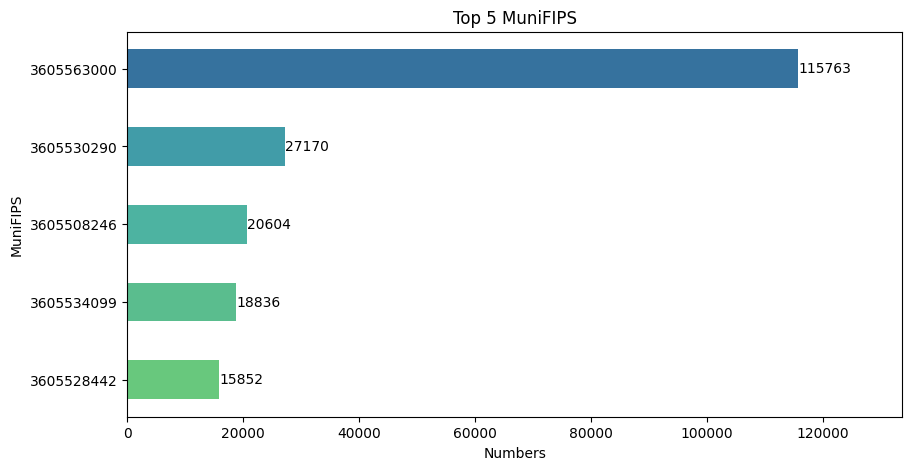

In [166]:
t_labels = TCT[::-1].index
t_values = TCT[::-1].values
t_labels = t_labels.astype(str)
colors = ['#36729e', '#419ca8', '#4db3a1', '#5abd8e', '#68c87d']

plt.figure(figsize=(10, 5))
plt.barh(t_labels, t_values, height=0.5, color = colors[::-1])

for index, j in enumerate(t_values):
    plt.text(j, index, str(j), va= "center", ha= "left", fontsize = 10)

plt.title("Top 5 MuniFIPS")
plt.xlabel("Numbers")
plt.ylabel("MuniFIPS")

axis = plt.gca()
axis.set_xlim(0, axis.get_xlim()[1] * 1.1)
plt.show()


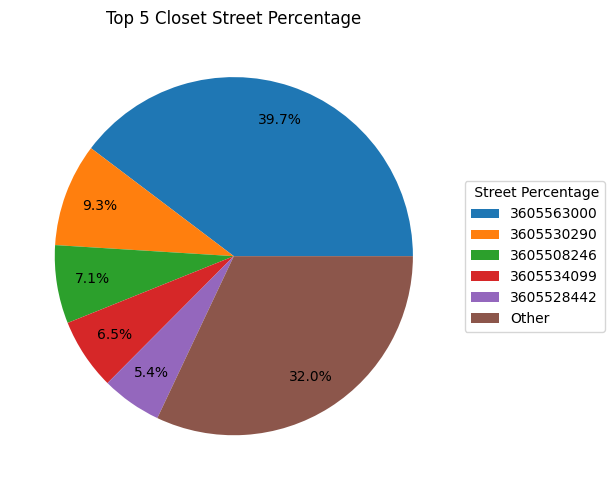

In [167]:
#Source: https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_and_donut_labels.html
pie_data = pd.concat([TCT, pd.Series({"Other": Other})])
fig, ax = plt.subplots(figsize=(10, 5))
wedges,_,_ = ax.pie(
    pie_data.values,
    labels = None,           
    autopct ='%1.1f%%',        
    pctdistance = 0.8
)

ax.legend(wedges, pie_data.index,
          title = " Street Percentage",
          loc = "center left",
          bbox_to_anchor = (1, 0, 0.5, 1))
ax.set_title("Top 5 Closet Street Percentage")
plt.tight_layout()
plt.show()

In [168]:
freqtb_y = pd.crosstab(df["CaseYear"], df["MuniFIPS"])
freqtb_y

MuniFIPS,3605508246,3605515462,3605515957,3605522870,360552287022865,3605528442,3605530290,3605531797,3605534099,3605537726,...,3605561808,360556180815638,3605563000,3605564144,3605572455,360557245508466,3605578971,360557897178960,3605581402,360558140265959
CaseYear,,,,,,,,,,,,,,,,,,,,,
2012,1734,745,141,0,150,1311,2292,122,1635,1188,...,157,27,8270,163,329,136,693,114,117,21
2013,1871,764,154,5,142,1321,2232,108,1634,1188,...,179,13,9288,163,315,145,747,128,181,15
2014,1767,703,136,6,155,1342,2135,136,1440,1200,...,151,26,8947,173,321,133,823,153,149,38
2015,1801,647,154,5,119,1416,2292,115,1608,1217,...,143,20,10218,164,306,150,881,161,150,28
2016,1746,628,143,13,134,1283,2092,105,1547,1148,...,133,18,10136,149,317,155,775,133,115,30
2017,1756,580,147,8,104,1294,2065,87,1544,1152,...,142,15,9858,188,289,161,650,83,145,22
2018,1687,613,156,5,149,1332,2271,97,1462,1172,...,128,16,10013,164,298,153,700,130,153,31
2019,1734,644,177,4,156,1387,2203,98,1555,1111,...,107,22,10430,173,307,151,706,136,135,25
2020,1027,516,132,5,87,950,1731,88,1018,801,...,114,6,8369,121,252,82,525,70,116,21


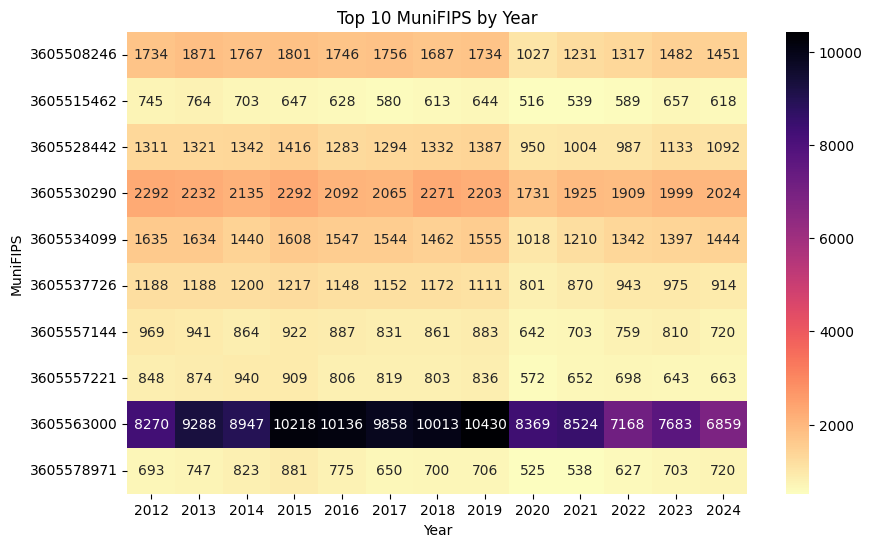

In [169]:
TCT10_i = df["MuniFIPS"].value_counts().head(10).index
TCT10 = df[df["MuniFIPS"].isin(TCT10_i)]
freqtb10_y = pd.crosstab(TCT10["CaseYear"], TCT10["MuniFIPS"])

plt.figure(figsize=(10, 6))
sns.heatmap(freqtb10_y.T, annot = True, fmt="d", cmap="magma_r")
plt.title("Top 10 MuniFIPS by Year")
plt.xlabel("Year")
plt.ylabel("MuniFIPS")
plt.show()

In [170]:
ptb_y = (pd.crosstab( df["CaseYear"], df["MuniFIPS"],normalize = "index") * 100).round(3)
ptb_y

MuniFIPS,3605508246,3605515462,3605515957,3605522870,360552287022865,3605528442,3605530290,3605531797,3605534099,3605537726,...,3605561808,360556180815638,3605563000,3605564144,3605572455,360557245508466,3605578971,360557897178960,3605581402,360558140265959
CaseYear,,,,,,,,,,,,,,,,,,,,,
2012,7.475,3.212,0.608,0.000,0.647,5.652,9.881,0.526,7.048,5.121,...,0.677,0.116,35.651,0.703,1.418,0.586,2.987,0.491,0.504,0.091
2013,7.648,3.123,0.629,0.020,0.580,5.400,9.124,0.441,6.679,4.856,...,0.732,0.053,37.966,0.666,1.288,0.593,3.053,0.523,0.740,0.061
2014,7.434,2.958,0.572,0.025,0.652,5.646,8.982,0.572,6.058,5.049,...,0.635,0.109,37.641,0.728,1.350,0.560,3.462,0.644,0.627,0.160
2015,7.081,2.544,0.605,0.020,0.468,5.567,9.012,0.452,6.322,4.785,...,0.562,0.079,40.175,0.645,1.203,0.590,3.464,0.633,0.590,0.110
2016,7.156,2.574,0.586,0.053,0.549,5.258,8.574,0.430,6.340,4.705,...,0.545,0.074,41.541,0.611,1.299,0.635,3.176,0.545,0.471,0.123
2017,7.385,2.439,0.618,0.034,0.437,5.442,8.684,0.366,6.493,4.845,...,0.597,0.063,41.457,0.791,1.215,0.677,2.734,0.349,0.610,0.093
2018,6.969,2.532,0.644,0.021,0.616,5.503,9.382,0.401,6.040,4.842,...,0.529,0.066,41.366,0.678,1.231,0.632,2.892,0.537,0.632,0.128
2019,7.005,2.601,0.715,0.016,0.630,5.603,8.899,0.396,6.282,4.488,...,0.432,0.089,42.133,0.699,1.240,0.610,2.852,0.549,0.545,0.101
2020,5.565,2.796,0.715,0.027,0.471,5.147,9.379,0.477,5.516,4.340,...,0.618,0.033,45.346,0.656,1.365,0.444,2.845,0.379,0.629,0.114


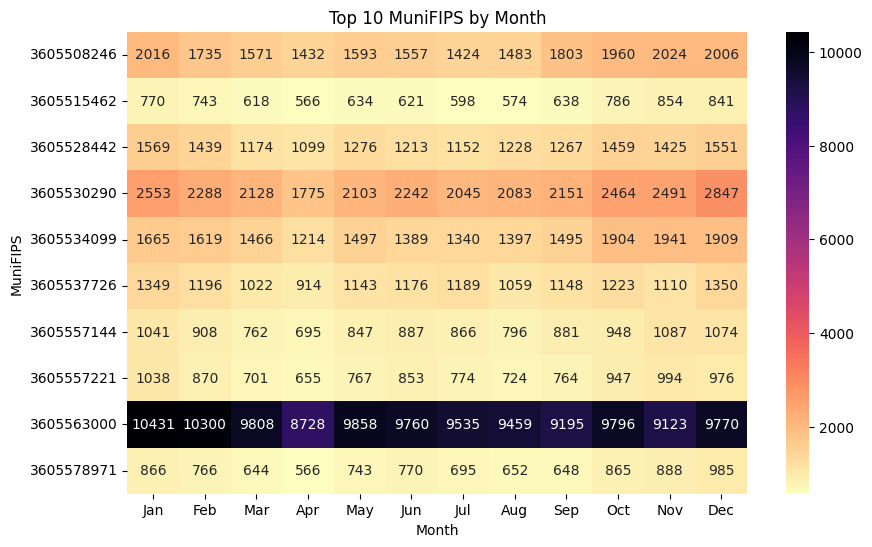

In [171]:
TCT10_i = df["MuniFIPS"].value_counts().head(10).index
TCT10 = df[df["MuniFIPS"].isin(TCT10_i)]
freqtb10_y = pd.crosstab(TCT10["CaseMonth"], TCT10["MuniFIPS"])

plt.figure(figsize=(10, 6))
ax = sns.heatmap(freqtb10_y.T, annot = True, fmt="d", cmap="magma_r")
ax.set_xticklabels(calendar.month_abbr[1:13])
plt.title("Top 10 MuniFIPS by Month")
plt.xlabel("Month")
plt.ylabel("MuniFIPS")
plt.show()

In [172]:
tcy = freqtb_y.idxmax( axis= 1)
tcy

CaseYear
2012    3605563000
2013    3605563000
2014    3605563000
2015    3605563000
2016    3605563000
2017    3605563000
2018    3605563000
2019    3605563000
2020    3605563000
2021    3605563000
2022    3605563000
2023    3605563000
2024    3605563000
dtype: string

## Master Intersect ID

In [173]:
df["MasterIntersectionId"].dtype

dtype('float64')

In [174]:
df["MasterIntersectionId"] = pd.to_numeric(df["MasterIntersectionId"], errors= "coerce").astype("Int64").astype("string")

In [175]:
count = len(df["MasterIntersectionId"])
count

291634

In [176]:
null_count = df["MasterIntersectionId"].isna().sum()
null_count

118105

In [177]:
null_prop = float(null_count/count)
round(null_prop * 100, 3)

40.498

In [178]:
df["MasterIntersectionId"].nunique()

10286

In [179]:
tdf = df["MasterIntersectionId"].copy().fillna("Unknown").astype("string")

In [180]:
tdf.value_counts()

MasterIntersectionId
Unknown    118105
5007733       588
5009350       543
5007072       526
5006150       506
            ...  
5012414         1
5011785         1
5010842         1
5011790         1
5013103         1
Name: count, Length: 10287, dtype: Int64

In [181]:
tdf = tdf.replace("777", "Unknown")

In [182]:
tdf = tdf.replace("998", "Unknown")

In [183]:
tdf = tdf.replace("888", "Unknown")

In [184]:
tdf = tdf.replace("999", "Unknown")

In [185]:
df["MasterIntersectionId"] = tdf.replace("Unknown", np.nan)
tdf = tdf.replace("Unknown", np.nan)

In [186]:
TCT = tdf.value_counts().head(5)
Other = tdf.value_counts().iloc[5:].sum()
TCT

MasterIntersectionId
5007733    588
5009350    543
5007072    526
5006150    506
5007582    495
Name: count, dtype: Int64

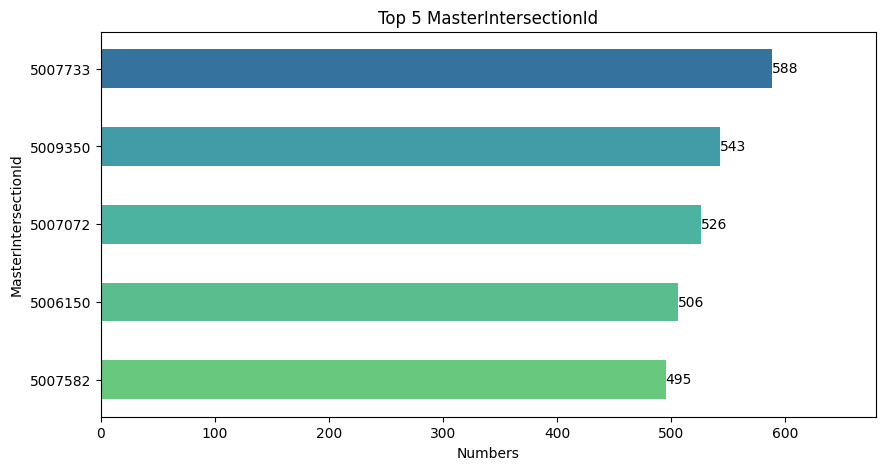

In [187]:
t_labels = TCT[::-1].index
t_values = TCT[::-1].values
t_labels = t_labels.astype(str)
colors = ['#36729e', '#419ca8', '#4db3a1', '#5abd8e', '#68c87d']

plt.figure(figsize=(10, 5))
plt.barh(t_labels, t_values, height=0.5, color = colors[::-1])

for index, j in enumerate(t_values):
    plt.text(j, index, str(j), va= "center", ha= "left", fontsize = 10)

plt.title("Top 5 MasterIntersectionId")
plt.xlabel("Numbers")
plt.ylabel("MasterIntersectionId")

axis = plt.gca()
axis.set_xlim(0, axis.get_xlim()[1] * 1.1)
plt.show()


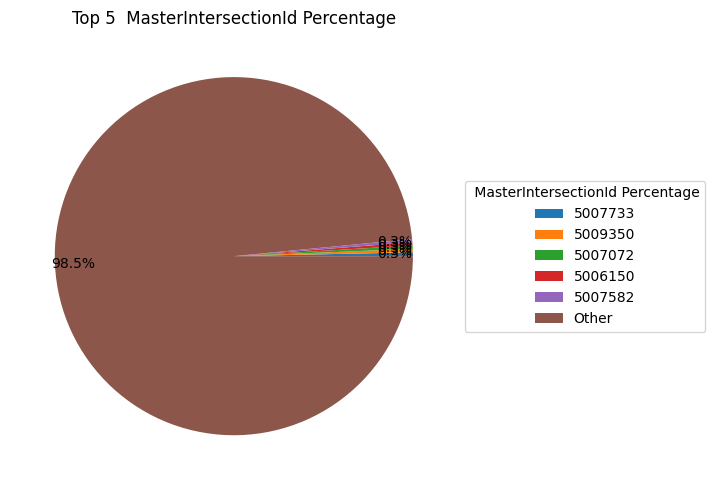

In [188]:
pie_data = pd.concat([TCT, pd.Series({"Other": Other})])
fig, ax = plt.subplots(figsize=(10, 5))
wedges,_,_ = ax.pie(
    pie_data.values,
    labels = None,           
    autopct ='%1.1f%%',        
    pctdistance = 0.9
)

ax.legend(wedges, pie_data.index,
          title = " MasterIntersectionId Percentage",
          loc = "center left",
          bbox_to_anchor = (1, 0, 0.5, 1))
ax.set_title("Top 5  MasterIntersectionId Percentage")
plt.tight_layout()
plt.show()

In [189]:
freqtb_y = pd.crosstab(df["CaseYear"], df["MasterIntersectionId"])
freqtb_y

MasterIntersectionId,15000145,15000152,15000153,15000157,15000173,15000338,15000551,15000608,15000733,15000734,...,7016007,7018712,7018713,7018714,7018716,7018717,7018720,7018721,7019976,7021979
CaseYear,,,,,,,,,,,,,,,,,,,,,
2012,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
2013,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,4,0,1,0,0,1
2014,0,0,0,4,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2017,0,0,0,0,0,0,0,0,3,0,...,0,0,0,2,4,0,1,1,0,0
2018,2,0,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
2019,4,1,0,1,1,0,0,0,2,0,...,0,0,0,0,1,0,1,0,0,0
2020,1,0,0,0,0,0,0,0,1,0,...,0,0,0,3,2,1,0,0,0,0


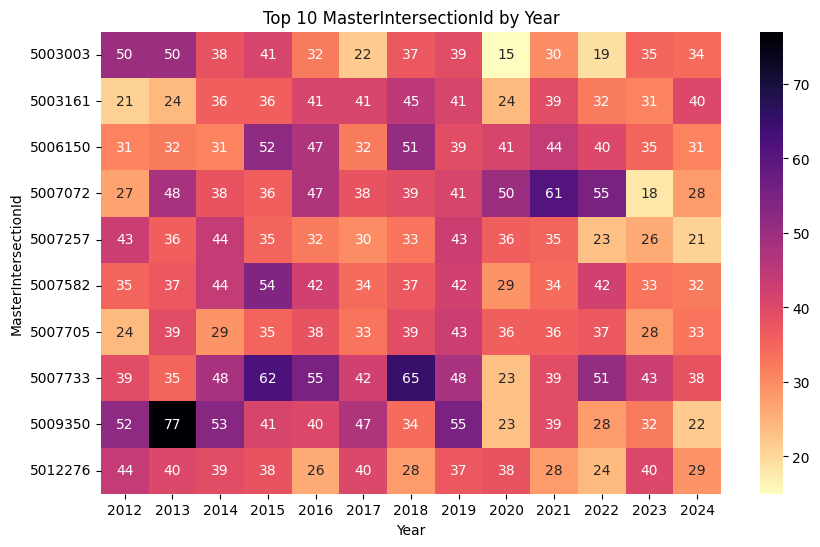

In [190]:
TCT10_i = df["MasterIntersectionId"].value_counts().head(10).index
TCT10 = df[df["MasterIntersectionId"].isin(TCT10_i)]
freqtb10_y = pd.crosstab(TCT10["CaseYear"], TCT10["MasterIntersectionId"])

plt.figure(figsize=(10, 6))
sns.heatmap(freqtb10_y.T, annot = True, fmt="d", cmap="magma_r")
plt.title("Top 10 MasterIntersectionId by Year")
plt.xlabel("Year")
plt.ylabel("MasterIntersectionId")
plt.show()

In [191]:
ptb_y = (pd.crosstab( df["CaseYear"], df["MasterIntersectionId"],normalize = "index") * 100).round(3)
ptb_y

MasterIntersectionId,15000145,15000152,15000153,15000157,15000173,15000338,15000551,15000608,15000733,15000734,...,7016007,7018712,7018713,7018714,7018716,7018717,7018720,7018721,7019976,7021979
CaseYear,,,,,,,,,,,,,,,,,,,,,
2012,0.000,0.000,0.000,0.007,0.000,0.000,0.000,0.00,0.007,0.000,...,0.00,0.000,0.000,0.000,0.007,0.000,0.000,0.007,0.000,0.000
2013,0.000,0.000,0.000,0.007,0.000,0.000,0.000,0.00,0.000,0.000,...,0.00,0.007,0.000,0.000,0.028,0.000,0.007,0.000,0.000,0.007
2014,0.000,0.000,0.000,0.029,0.000,0.000,0.000,0.00,0.000,0.000,...,0.00,0.000,0.000,0.000,0.014,0.000,0.000,0.000,0.000,0.000
2015,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,...,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2016,0.000,0.000,0.000,0.007,0.000,0.000,0.000,0.00,0.007,0.000,...,0.00,0.000,0.000,0.007,0.000,0.000,0.000,0.000,0.000,0.000
2017,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.020,0.000,...,0.00,0.000,0.000,0.013,0.027,0.000,0.007,0.007,0.000,0.000
2018,0.013,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.007,0.000,...,0.00,0.000,0.007,0.000,0.007,0.000,0.000,0.000,0.000,0.000
2019,0.026,0.007,0.000,0.007,0.007,0.000,0.000,0.00,0.013,0.000,...,0.00,0.000,0.000,0.000,0.007,0.000,0.007,0.000,0.000,0.000
2020,0.009,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.009,0.000,...,0.00,0.000,0.000,0.026,0.018,0.009,0.000,0.000,0.000,0.000


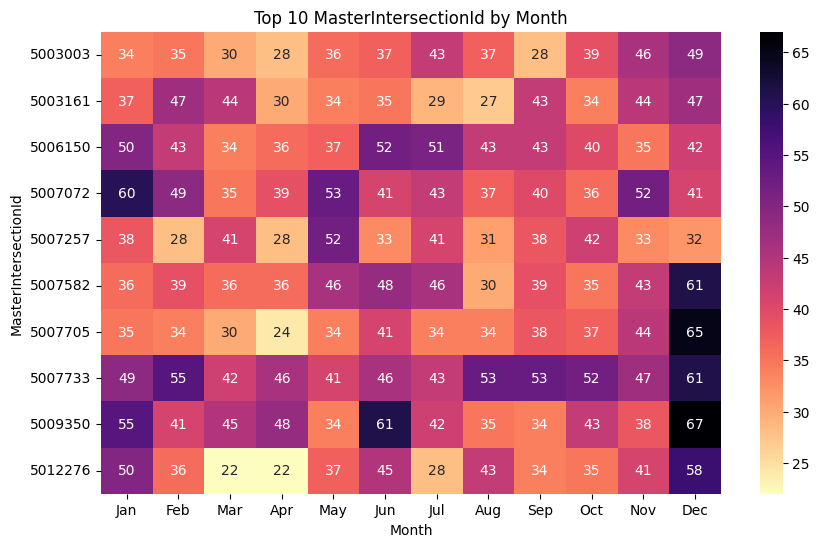

In [192]:
TCT10_i = df["MasterIntersectionId"].value_counts().head(10).index
TCT10 = df[df["MasterIntersectionId"].isin(TCT10_i)]
freqtb10_y = pd.crosstab(TCT10["CaseMonth"], TCT10["MasterIntersectionId"])

plt.figure(figsize=(10, 6))
ax = sns.heatmap(freqtb10_y.T, annot = True, fmt="d", cmap="magma_r")
ax.set_xticklabels(calendar.month_abbr[1:13])
plt.title("Top 10 MasterIntersectionId by Month")
plt.xlabel("Month")
plt.ylabel("MasterIntersectionId")
plt.show()

In [193]:
tcy = freqtb_y.idxmax( axis= 1)
tcy

CaseYear
2012    5003750
2013    5009350
2014    5009350
2015    5007733
2016    5007733
2017    5009350
2018    5007733
2019    5009350
2020    5007072
2021    5007072
2022    5007072
2023    5007733
2024    5003161
dtype: string

## DirectionFromIntersection

In [194]:
df["DirectionFromIntersection"].dtype

dtype('float64')

In [195]:
df["DirectionFromIntersection"] = pd.to_numeric(df["DirectionFromIntersection"], errors= "coerce").astype("Int64").astype("string")

In [196]:
count = len(df["DirectionFromIntersection"])
count

291634

In [197]:
null_count = df["DirectionFromIntersection"].isna().sum()
null_count

43099

In [198]:
null_prop = float(null_count/count)
round(null_prop * 100, 3)

14.778

In [199]:
df["DirectionFromIntersection"].nunique()

7

In [200]:
tdf = df["DirectionFromIntersection"].copy().fillna("Unknown").astype("string")

In [201]:
tdf.value_counts()

DirectionFromIntersection
7          63636
1          56799
8          53883
4          51075
Unknown    43099
3          11920
5          11220
6              2
Name: count, dtype: Int64

In [202]:
(tdf.value_counts(normalize = True) * 100).round(3)

DirectionFromIntersection
7          21.821
1          19.476
8          18.476
4          17.513
Unknown    14.778
3           4.087
5           3.847
6           0.001
Name: proportion, dtype: Float64

In [203]:
df["DirectionFromIntersection"] = tdf.replace("Unknown", np.nan)
tdf = tdf.replace("Unknown", np.nan)

In [204]:

TCT = tdf.value_counts().head(5)
Other = tdf.value_counts().iloc[5:].sum()
TCT

DirectionFromIntersection
7    63636
1    56799
8    53883
4    51075
3    11920
Name: count, dtype: Int64

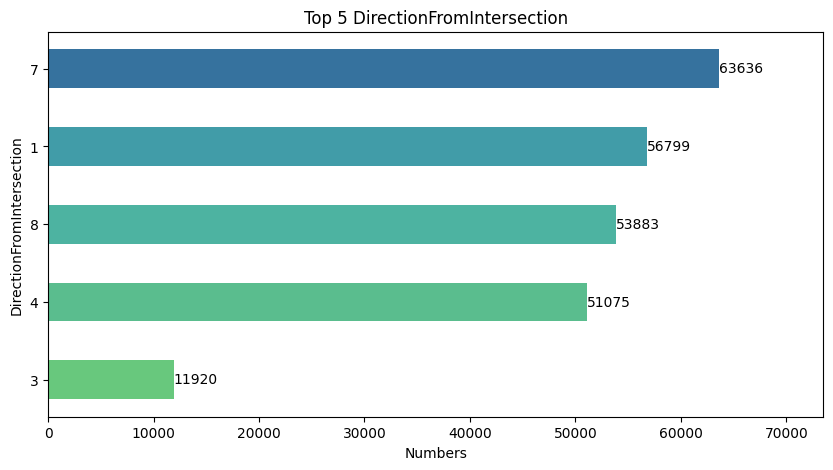

In [205]:
t_labels = TCT[::-1].index
t_values = TCT[::-1].values
t_labels = t_labels.astype(str)
colors = ['#36729e', '#419ca8', '#4db3a1', '#5abd8e', '#68c87d']

plt.figure(figsize=(10, 5))
plt.barh(t_labels, t_values, height=0.5, color = colors[::-1])

for index, j in enumerate(t_values):
    plt.text(j, index, str(j), va= "center", ha= "left", fontsize = 10)

plt.title("Top 5 DirectionFromIntersection")
plt.xlabel("Numbers")
plt.ylabel("DirectionFromIntersection")

axis = plt.gca()
axis.set_xlim(0, axis.get_xlim()[1] * 1.1)
plt.show()


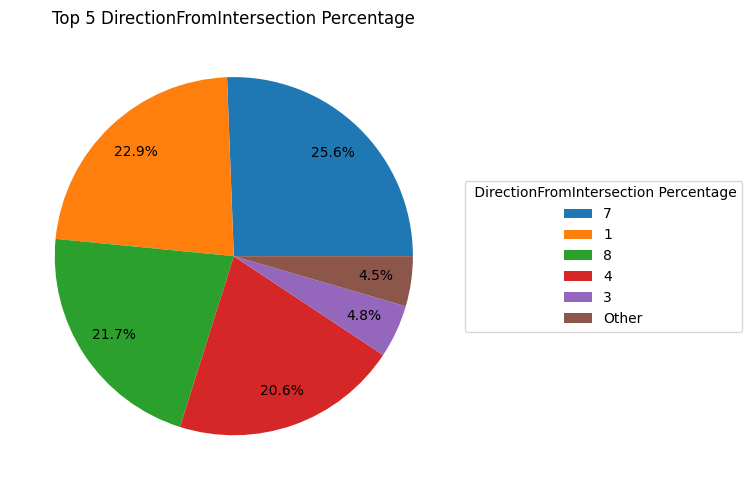

In [206]:
#Source: https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_and_donut_labels.html
pie_data = pd.concat([TCT, pd.Series({"Other": Other})])
fig, ax = plt.subplots(figsize=(10, 5))
wedges,_,_ = ax.pie(
    pie_data.values,
    labels = None,           
    autopct ='%1.1f%%',        
    pctdistance = 0.8
)

ax.legend(wedges, pie_data.index,
          title = " DirectionFromIntersection Percentage",
          loc = "center left",
          bbox_to_anchor = (1, 0, 0.5, 1))
ax.set_title("Top 5 DirectionFromIntersection Percentage")
plt.tight_layout()
plt.show()

In [207]:
freqtb_y = pd.crosstab(df["CaseYear"], df["DirectionFromIntersection"])
freqtb_y

DirectionFromIntersection,1,3,4,5,6,7,8
CaseYear,,,,,,,
2012,4497,0,4788,0,0,5298,5216
2013,4729,0,5093,0,0,5304,5259
2014,4465,0,4908,0,0,5027,4965
2015,4699,0,5142,0,0,5382,5439
2016,4676,0,5211,0,0,5249,5538
2017,4621,2,5129,1,0,5058,5490
2018,4580,8,5161,4,0,5173,5565
2019,4813,9,5205,7,0,5339,5647
2020,3464,20,3983,3,0,4103,4218


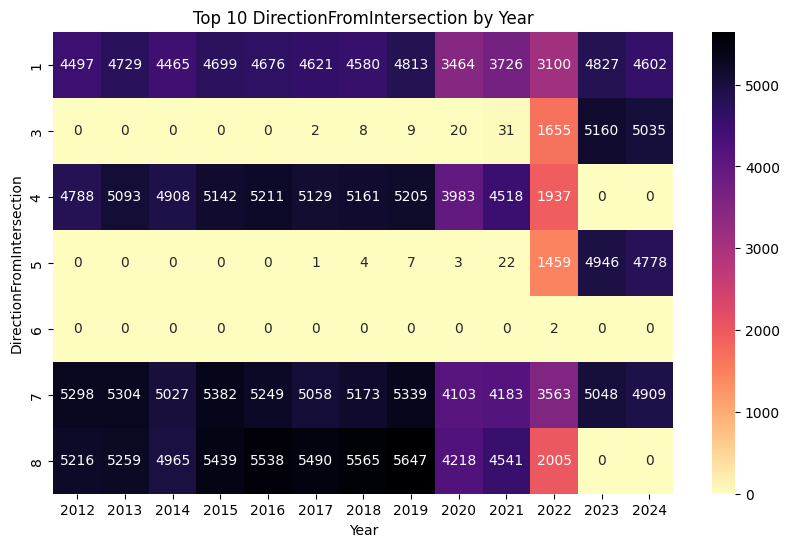

In [208]:
TCT10_i = df["DirectionFromIntersection"].value_counts().head(10).index
TCT10 = df[df["DirectionFromIntersection"].isin(TCT10_i)]
freqtb10_y = pd.crosstab(TCT10["CaseYear"], TCT10["DirectionFromIntersection"])

plt.figure(figsize=(10, 6))
sns.heatmap(freqtb10_y.T, annot = True, fmt="d", cmap="magma_r")
plt.title("Top 10 DirectionFromIntersection by Year")
plt.xlabel("Year")
plt.ylabel("DirectionFromIntersection")
plt.show()

In [209]:
ptb_y = (pd.crosstab( df["CaseYear"], df["DirectionFromIntersection"],normalize = "index") * 100).round(3)
ptb_y

DirectionFromIntersection,1,3,4,5,6,7,8
CaseYear,,,,,,,
2012,22.713,0.000,24.183,0.000,0.000,26.759,26.345
2013,23.198,0.000,24.984,0.000,0.000,26.019,25.798
2014,23.057,0.000,25.345,0.000,0.000,25.959,25.639
2015,22.742,0.000,24.886,0.000,0.000,26.048,26.324
2016,22.618,0.000,25.206,0.000,0.000,25.389,26.787
2017,22.762,0.010,25.265,0.005,0.000,24.915,27.043
2018,22.351,0.039,25.187,0.020,0.000,25.245,27.158
2019,22.897,0.043,24.762,0.033,0.000,25.400,26.865
2020,21.937,0.127,25.223,0.019,0.000,25.983,26.711


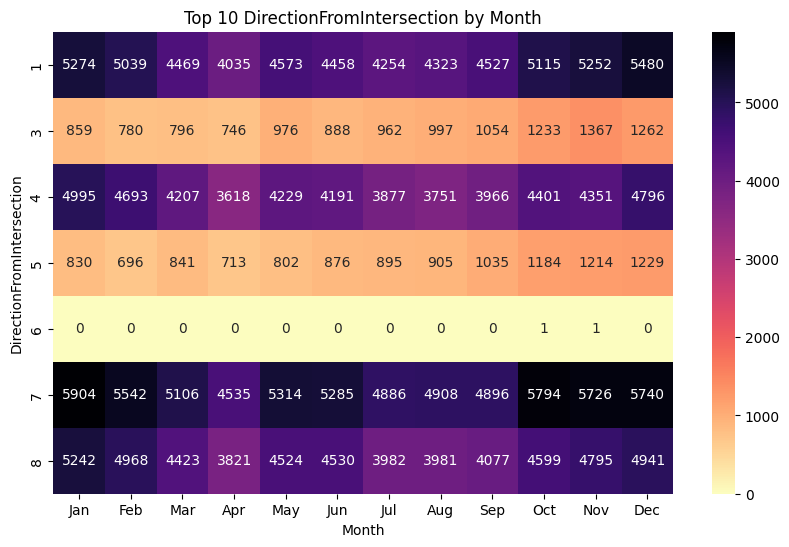

In [210]:
TCT10_i = df["DirectionFromIntersection"].value_counts().head(10).index
TCT10 = df[df["DirectionFromIntersection"].isin(TCT10_i)]
freqtb10_y = pd.crosstab(TCT10["CaseMonth"], TCT10["DirectionFromIntersection"])

plt.figure(figsize=(10, 6))
ax = sns.heatmap(freqtb10_y.T, annot = True, fmt="d", cmap="magma_r")
ax.set_xticklabels(calendar.month_abbr[1:13])
plt.title("Top 10 DirectionFromIntersection by Month")
plt.xlabel("Month")
plt.ylabel("DirectionFromIntersection")
plt.show()

In [211]:
tcy = freqtb_y.idxmax( axis= 1)
tcy

CaseYear
2012    7
2013    7
2014    7
2015    8
2016    8
2017    8
2018    8
2019    8
2020    8
2021    8
2022    7
2023    3
2024    3
dtype: string

## ReferenceMarker

In [212]:
df["ReferenceMarker"].dtype

dtype('O')

In [213]:
count = len(df["ReferenceMarker"])
count

291634

In [214]:
null_count = df["ReferenceMarker"].isna().sum()
null_count

163310

In [215]:
null_prop = float(null_count/count)
round(null_prop * 100, 3)

55.998

In [216]:
df["ReferenceMarker"].nunique()

5158

In [217]:
tdf = df["ReferenceMarker"].copy().fillna("Unknown").astype("string")

In [218]:
tdf.value_counts()

ReferenceMarker
Unknown         163310
15A43041128        585
940M43011012       532
15 43031114        488
940M43011020       451
                 ...  
260 43011070         1
252A43011005         1
252A43011045         1
252A43011019         1
261 43011071         1
Name: count, Length: 5159, dtype: Int64

In [219]:
tdf = tdf.replace("777", "Unknown")

In [220]:
tdf = tdf.replace("888", "Unknown")

In [221]:
tdf = tdf.replace("998", "Unknown")

In [222]:
tdf = tdf.replace("999", "Unknown")

In [223]:
df["ReferenceMarker"] = tdf.replace("Unknown", np.nan)
tdf = tdf.replace("Unknown", np.nan)

In [224]:
TCT = tdf.value_counts().head(5)
Other = tdf.value_counts().iloc[5:].sum()
TCT

ReferenceMarker
15A43041128     585
940M43011012    532
15 43031114     488
940M43011020    451
104 43031160    395
Name: count, dtype: Int64

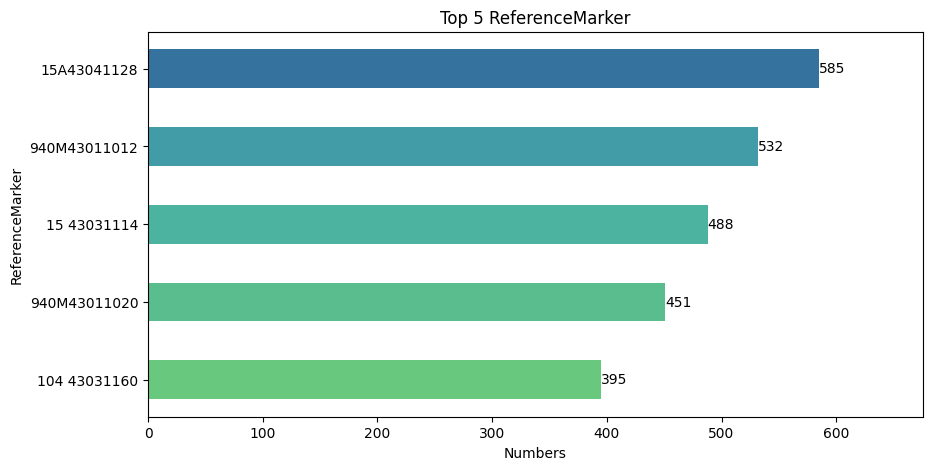

In [225]:
t_labels = TCT[::-1].index
t_values = TCT[::-1].values
t_labels = t_labels.astype(str)
colors = ['#36729e', '#419ca8', '#4db3a1', '#5abd8e', '#68c87d']

plt.figure(figsize=(10, 5))
plt.barh(t_labels, t_values, height=0.5, color = colors[::-1])

for index, j in enumerate(t_values):
    plt.text(j, index, str(j), va= "center", ha= "left", fontsize = 10)

plt.title("Top 5 ReferenceMarker")
plt.xlabel("Numbers")
plt.ylabel("ReferenceMarker")

axis = plt.gca()
axis.set_xlim(0, axis.get_xlim()[1] * 1.1)
plt.show()


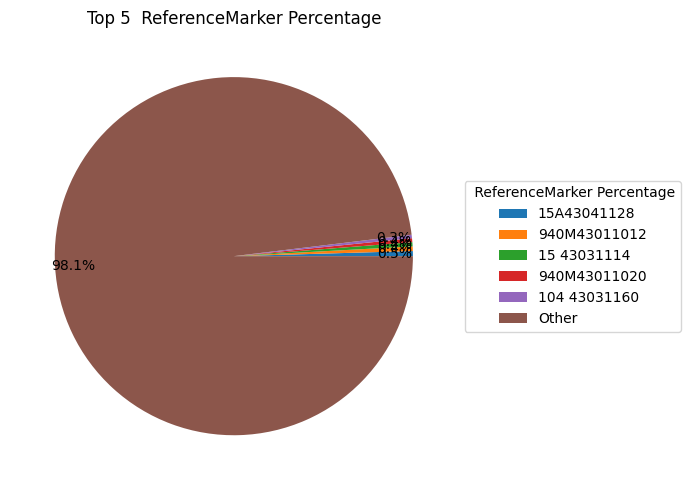

In [226]:
pie_data = pd.concat([TCT, pd.Series({"Other": Other})])
fig, ax = plt.subplots(figsize=(10, 5))
wedges,_,_ = ax.pie(
    pie_data.values,
    labels = None,           
    autopct ='%1.1f%%',        
    pctdistance = 0.9
)

ax.legend(wedges, pie_data.index,
          title = " ReferenceMarker Percentage",
          loc = "center left",
          bbox_to_anchor = (1, 0, 0.5, 1))
ax.set_title("Top 5  ReferenceMarker Percentage")
plt.tight_layout()
plt.show()

In [227]:
freqtb_y = pd.crosstab(df["CaseYear"], df["ReferenceMarker"])
freqtb_y

ReferenceMarker,104 37041000,104 37041030,104 43031000,104 43031001,104 43031002,104 43031003,104 43031004,104 43031005,104 43031006,104 43031007,...,96 43052027,96 43052028,96 43052029,96 43052030,96 43052031,96 44041270,96 44041272,96 44041274,96 44041282,96 44041283
CaseYear,,,,,,,,,,,,,,,,,,,,,
2012,5,0,0,0,0,0,0,0,1,0,...,7,0,10,7,4,0,0,0,0,2
2013,2,0,0,0,0,0,0,1,0,0,...,12,2,6,12,6,0,0,0,1,0
2014,2,0,0,2,0,0,0,0,1,2,...,7,6,10,8,0,0,0,0,1,0
2015,0,0,1,0,0,0,0,0,0,0,...,10,8,8,9,4,0,0,0,1,0
2016,1,0,1,0,1,0,0,0,0,0,...,8,1,5,2,4,0,0,0,0,0
2017,3,0,0,0,0,1,0,2,0,0,...,8,5,11,13,7,0,0,0,0,0
2018,3,0,0,1,1,0,0,0,0,0,...,7,1,5,10,1,0,0,0,0,0
2019,1,0,1,0,0,0,0,1,0,2,...,8,3,3,16,3,0,0,0,0,0
2020,2,0,0,1,0,0,1,1,1,0,...,5,2,4,1,3,0,0,0,1,0


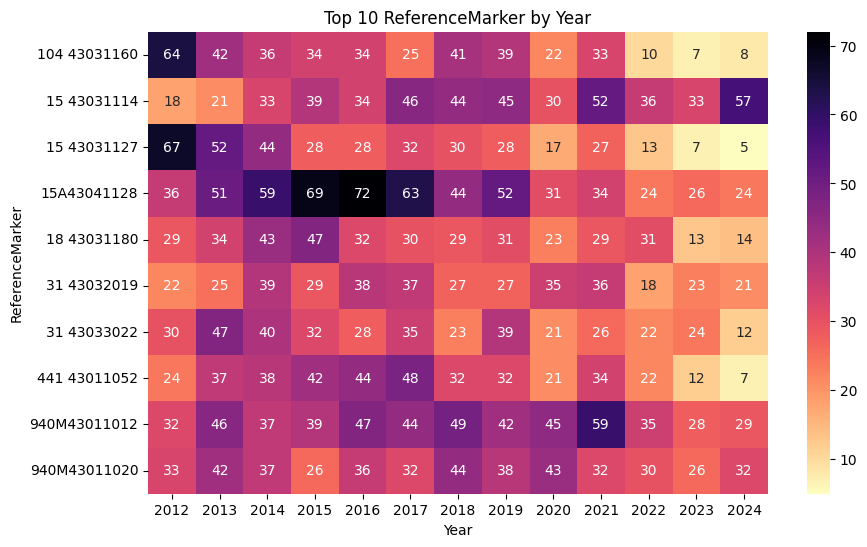

In [228]:
TCT10_i = df["ReferenceMarker"].value_counts().head(10).index
TCT10 = df[df["ReferenceMarker"].isin(TCT10_i)]
freqtb10_y = pd.crosstab(TCT10["CaseYear"], TCT10["ReferenceMarker"])

plt.figure(figsize=(10, 6))
sns.heatmap(freqtb10_y.T, annot = True, fmt="d", cmap="magma_r")
plt.title("Top 10 ReferenceMarker by Year")
plt.xlabel("Year")
plt.ylabel("ReferenceMarker")
plt.show()

In [229]:
ptb_y = (pd.crosstab( df["CaseYear"], df["ReferenceMarker"],normalize = "index") * 100).round(3)
ptb_y

ReferenceMarker,104 37041000,104 37041030,104 43031000,104 43031001,104 43031002,104 43031003,104 43031004,104 43031005,104 43031006,104 43031007,...,96 43052027,96 43052028,96 43052029,96 43052030,96 43052031,96 44041270,96 44041272,96 44041274,96 44041282,96 44041283
CaseYear,,,,,,,,,,,,,,,,,,,,,
2012,0.045,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.009,0.000,...,0.063,0.000,0.091,0.063,0.036,0.000,0.000,0.000,0.000,0.018
2013,0.018,0.000,0.000,0.000,0.000,0.000,0.000,0.009,0.000,0.000,...,0.106,0.018,0.053,0.106,0.053,0.000,0.000,0.000,0.009,0.000
2014,0.018,0.000,0.000,0.018,0.000,0.000,0.000,0.000,0.009,0.018,...,0.064,0.055,0.091,0.073,0.000,0.000,0.000,0.000,0.009,0.000
2015,0.000,0.000,0.009,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.092,0.073,0.073,0.082,0.037,0.000,0.000,0.000,0.009,0.000
2016,0.009,0.000,0.009,0.000,0.009,0.000,0.000,0.000,0.000,0.000,...,0.075,0.009,0.047,0.019,0.037,0.000,0.000,0.000,0.000,0.000
2017,0.029,0.000,0.000,0.000,0.000,0.010,0.000,0.019,0.000,0.000,...,0.076,0.048,0.105,0.124,0.067,0.000,0.000,0.000,0.000,0.000
2018,0.029,0.000,0.000,0.010,0.010,0.000,0.000,0.000,0.000,0.000,...,0.067,0.010,0.048,0.096,0.010,0.000,0.000,0.000,0.000,0.000
2019,0.009,0.000,0.009,0.000,0.000,0.000,0.000,0.009,0.000,0.019,...,0.075,0.028,0.028,0.150,0.028,0.000,0.000,0.000,0.000,0.000
2020,0.027,0.000,0.000,0.013,0.000,0.000,0.013,0.013,0.013,0.000,...,0.067,0.027,0.053,0.013,0.040,0.000,0.000,0.000,0.013,0.000


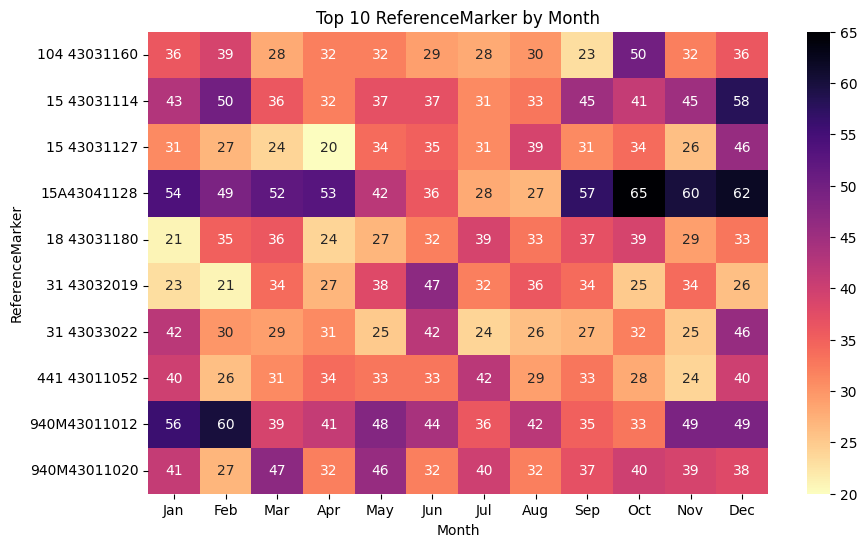

In [230]:
TCT10_i = df["ReferenceMarker"].value_counts().head(10).index
TCT10 = df[df["ReferenceMarker"].isin(TCT10_i)]
freqtb10_y = pd.crosstab(TCT10["CaseMonth"], TCT10["ReferenceMarker"])

plt.figure(figsize=(10, 6))
ax = sns.heatmap(freqtb10_y.T, annot = True, fmt="d", cmap="magma_r")
ax.set_xticklabels(calendar.month_abbr[1:13])
plt.title("Top 10 ReferenceMarker by Month")
plt.xlabel("Month")
plt.ylabel("ReferenceMarker")
plt.show()

In [231]:
tcy = freqtb_y.idxmax( axis= 1)
tcy

CaseYear
2012     15 43031127
2013     15 43031127
2014     15A43041128
2015     15A43041128
2016     15A43041128
2017     15A43041128
2018    940M43011012
2019     15A43041128
2020    940M43011012
2021    940M43011012
2022     15 43031114
2023    250 43011066
2024     15 43031114
dtype: string

## NonPublicWayCode

In [232]:
df["NonPublicWayCode"].dtype

dtype('int64')

In [233]:
df["NonPublicWayCode"] = pd.to_numeric(df["NonPublicWayCode"], errors= "coerce").astype("string")

In [234]:
count = len(df["NonPublicWayCode"])
count

291634

In [235]:
null_count = df["NonPublicWayCode"].isna().sum()
null_count

0

In [236]:
null_prop = float(null_count/count)
round(null_prop * 100, 3)

0.0

In [237]:
df["NonPublicWayCode"].nunique()

2

In [238]:
tdf = df["NonPublicWayCode"].copy()

In [239]:
tdf.value_counts()

NonPublicWayCode
0    286277
1      5357
Name: count, dtype: Int64

In [240]:
(tdf.value_counts(normalize = True) * 100).round(3)

NonPublicWayCode
0    98.163
1     1.837
Name: proportion, dtype: Float64

In [241]:
TCT = tdf.value_counts().head(5)

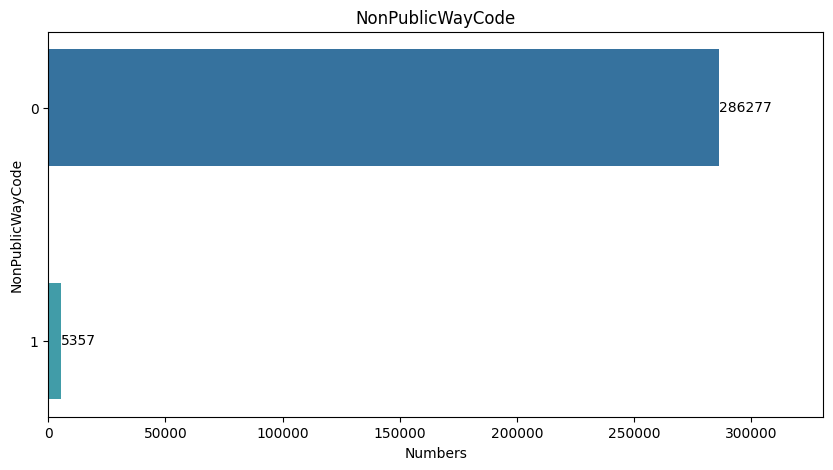

In [242]:
t_labels = TCT[::-1].index
t_values = TCT[::-1].values
t_labels = t_labels.astype(str)
colors = ['#36729e', '#419ca8']

plt.figure(figsize=(10, 5))
plt.barh(t_labels, t_values, height=0.5, color = colors[::-1])

for index, j in enumerate(t_values):
    plt.text(j, index, str(j), va= "center", ha= "left", fontsize = 10)

plt.title("NonPublicWayCode")
plt.xlabel("Numbers")
plt.ylabel("NonPublicWayCode")

axis = plt.gca()
axis.set_xlim(0, axis.get_xlim()[1] * 1.1)
plt.show()


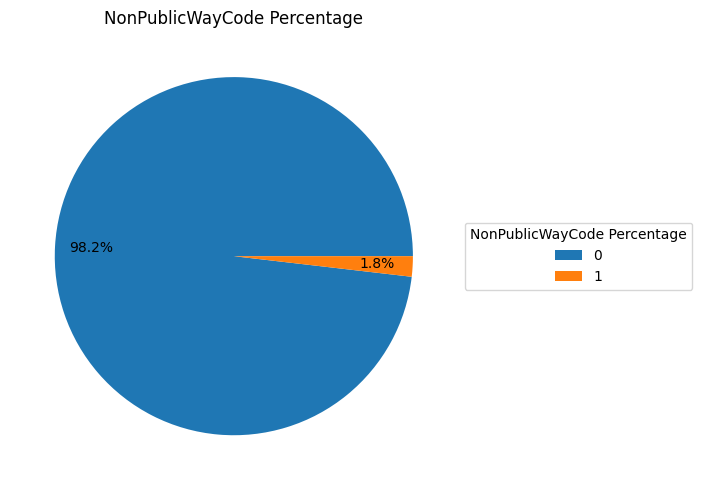

In [243]:
#Source: https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_and_donut_labels.html
pie_data = TCT
fig, ax = plt.subplots(figsize=(10, 5))
wedges,_,_ = ax.pie(
    pie_data.values,
    labels = None,           
    autopct ='%1.1f%%',        
    pctdistance = 0.8
)

ax.legend(wedges, pie_data.index,
          title = "NonPublicWayCode Percentage",
          loc = "center left",
          bbox_to_anchor = (1, 0, 0.5, 1))
ax.set_title("NonPublicWayCode Percentage")
plt.tight_layout()
plt.show()

## Name

In [244]:
df["NAME"].dtype

dtype('O')

In [245]:
count = len(df["NAME"])
count

291634

In [246]:
null_count = df["NAME"].isna().sum()
null_count

85897

In [247]:
null_prop = float(null_count/count)
round(null_prop * 100, 3)

29.454

In [248]:
df["NAME"].nunique()

5464

In [249]:
tdf = df["NAME"].copy().fillna("Unknown").astype("string")

In [250]:
tdf.value_counts()

NAME
Unknown                               85897
Dewey Ave                              5131
Culver Rd                              3782
Eastern Expressway                     3722
Rochester Outer Loop                   3499
                                      ...  
Carverdale Dr                             1
Bordeaux Way                              1
Morven Rd                                 1
Cooper Hall Drwy Suny At Brockport        1
Janice Dr                                 1
Name: count, Length: 5465, dtype: Int64

In [251]:
(tdf.value_counts(normalize = True) * 100).round(3)

NAME
Unknown                               29.454
Dewey Ave                              1.759
Culver Rd                              1.297
Eastern Expressway                     1.276
Rochester Outer Loop                     1.2
                                       ...  
Carverdale Dr                            0.0
Bordeaux Way                             0.0
Morven Rd                                0.0
Cooper Hall Drwy Suny At Brockport       0.0
Janice Dr                                0.0
Name: proportion, Length: 5465, dtype: Float64

In [252]:
df["NAME"] = tdf.replace("Unknown", np.nan)
tdf = tdf.replace("Unknown", np.nan)

In [253]:

TCT = tdf.value_counts().head(5)
Other = tdf.value_counts().iloc[5:].sum()
TCT

NAME
Dewey Ave               5131
Culver Rd               3782
Eastern Expressway      3722
Rochester Outer Loop    3499
Lake Ave                3476
Name: count, dtype: Int64

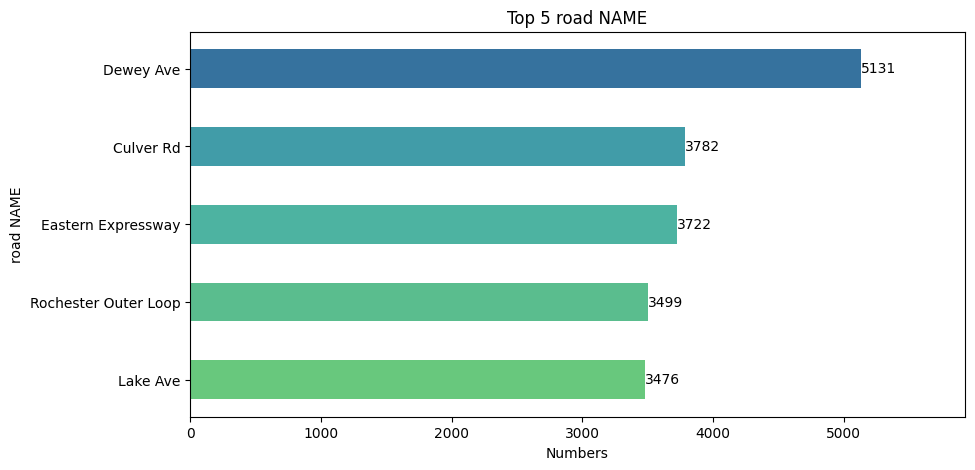

In [254]:
t_labels = TCT[::-1].index
t_values = TCT[::-1].values
t_labels = t_labels.astype(str)
colors = ['#36729e', '#419ca8', '#4db3a1', '#5abd8e', '#68c87d']

plt.figure(figsize=(10, 5))
plt.barh(t_labels, t_values, height=0.5, color = colors[::-1])

for index, j in enumerate(t_values):
    plt.text(j, index, str(j), va= "center", ha= "left", fontsize = 10)

plt.title("Top 5 road NAME")
plt.xlabel("Numbers")
plt.ylabel("road NAME")

axis = plt.gca()
axis.set_xlim(0, axis.get_xlim()[1] * 1.1)
plt.show()

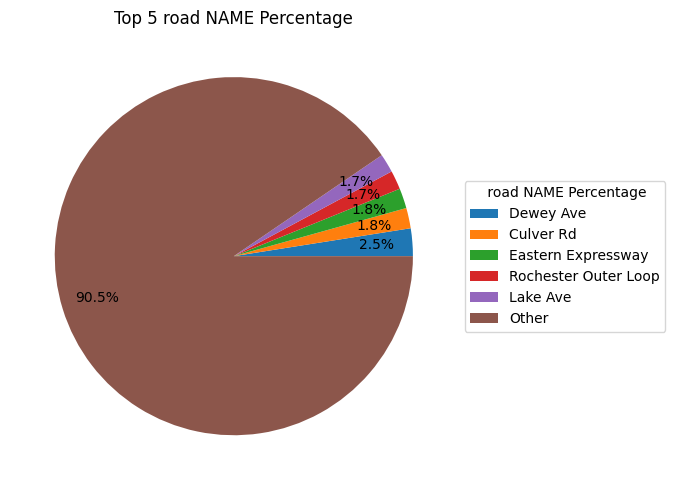

In [255]:
#Source: https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_and_donut_labels.html
pie_data = pd.concat([TCT, pd.Series({"Other": Other})])
fig, ax = plt.subplots(figsize=(10, 5))
wedges,_,_ = ax.pie(
    pie_data.values,
    labels = None,           
    autopct ='%1.1f%%',        
    pctdistance = 0.8
)

ax.legend(wedges, pie_data.index,
          title = " road NAME Percentage",
          loc = "center left",
          bbox_to_anchor = (1, 0, 0.5, 1))
ax.set_title("Top 5 road NAME Percentage")
plt.tight_layout()
plt.show()

In [256]:
freqtb_y = pd.crosstab(df["CaseYear"], df["NAME"])
freqtb_y

NAME,0I390004306C To E 0I390004306D,940K Nb To Ny104 Eb,940K Nb To Ny104 Wb,940K Nb To Ridgeway Ave,940K Sb To Ny104 Eb,940K Sb To Ny104 Wb,940K To I490 Eb,940K To I490 Wb,940K To Ramp B,940T Eb To E Main St,...,York Town Dr,Yorkshire Rd,Yorktown Dr,Youngs Ave,Zimbrich St,Zimmer St,Zoo Rd,Zornow Dr,Zuber Rd,Zygment St
CaseYear,,,,,,,,,,,,,,,,,,,,,
2012,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2013,0,0,0,0,0,0,2,1,0,1,...,0,1,0,1,0,0,0,0,1,0
2014,1,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,1,0,0,1
2015,0,0,0,0,0,0,0,1,0,0,...,0,2,0,0,2,0,0,0,1,0
2016,0,2,0,0,0,0,0,2,2,0,...,0,0,1,0,0,0,0,0,0,0
2017,1,0,0,1,1,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
2018,0,0,0,2,0,1,2,1,2,1,...,0,0,1,0,1,0,0,1,0,1
2019,1,1,0,1,1,0,0,0,0,1,...,0,1,1,2,0,0,0,0,0,1
2020,0,1,0,0,0,1,0,1,1,0,...,1,0,0,0,2,0,0,0,0,0


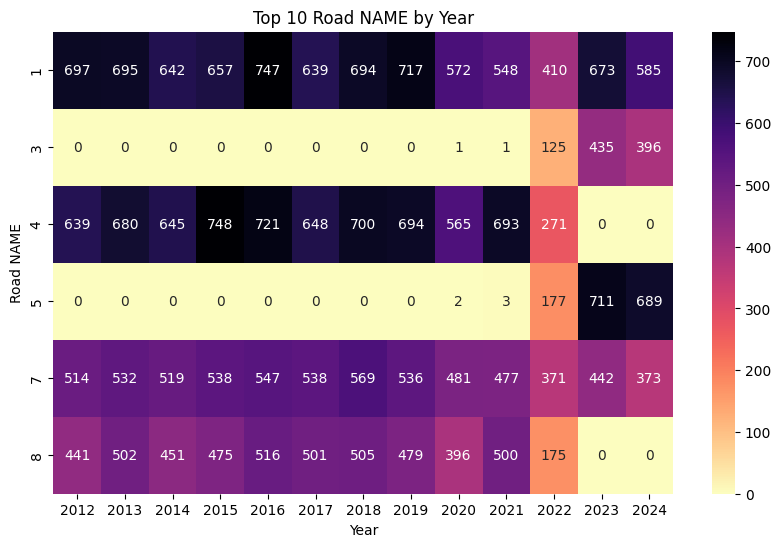

In [257]:
TCT10_i = df["NAME"].value_counts().head(10).index
TCT10 = df[df["NAME"].isin(TCT10_i)]
freqtb10_y = pd.crosstab(TCT10["CaseYear"], TCT10["DirectionFromIntersection"])

plt.figure(figsize=(10, 6))
sns.heatmap(freqtb10_y.T, annot = True, fmt="d", cmap="magma_r")
plt.title("Top 10 Road NAME by Year")
plt.xlabel("Year")
plt.ylabel("Road NAME")
plt.show()

In [258]:
ptb_y = (pd.crosstab( df["CaseYear"], df["DirectionFromIntersection"],normalize = "index") * 100).round(3)
ptb_y

DirectionFromIntersection,1,3,4,5,6,7,8
CaseYear,,,,,,,
2012,22.713,0.000,24.183,0.000,0.000,26.759,26.345
2013,23.198,0.000,24.984,0.000,0.000,26.019,25.798
2014,23.057,0.000,25.345,0.000,0.000,25.959,25.639
2015,22.742,0.000,24.886,0.000,0.000,26.048,26.324
2016,22.618,0.000,25.206,0.000,0.000,25.389,26.787
2017,22.762,0.010,25.265,0.005,0.000,24.915,27.043
2018,22.351,0.039,25.187,0.020,0.000,25.245,27.158
2019,22.897,0.043,24.762,0.033,0.000,25.400,26.865
2020,21.937,0.127,25.223,0.019,0.000,25.983,26.711


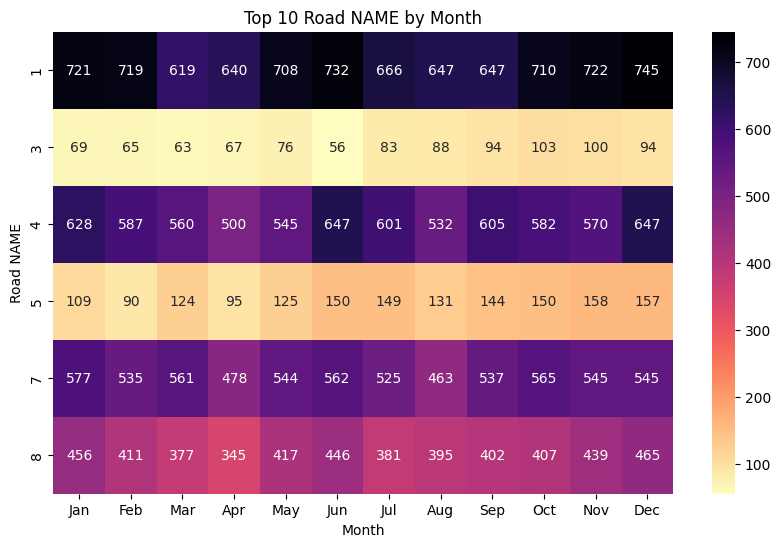

In [259]:
TCT10_i = df["NAME"].value_counts().head(10).index
TCT10 = df[df["NAME"].isin(TCT10_i)]
freqtb10_y = pd.crosstab(TCT10["CaseMonth"], TCT10["DirectionFromIntersection"])

plt.figure(figsize=(10, 6))
ax = sns.heatmap(freqtb10_y.T, annot = True, fmt="d", cmap="magma_r")
ax.set_xticklabels(calendar.month_abbr[1:13])
plt.title("Top 10 Road NAME by Month")
plt.xlabel("Month")
plt.ylabel("Road NAME")
plt.show()

In [260]:
tcy = freqtb_y.idxmax( axis= 1)
tcy

CaseYear
2012         Ridge Rd West
2013    Eastern Expressway
2014    Eastern Expressway
2015             Dewey Ave
2016             Dewey Ave
2017             Dewey Ave
2018             Dewey Ave
2019             Dewey Ave
2020             Dewey Ave
2021             Dewey Ave
2022             Dewey Ave
2023              Lake Ave
2024              Lake Ave
dtype: string